In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape # The dataset contains 1460 rows and 81 coloumns 

(1460, 81)

## Missing Values

In [4]:
# Let's make a list of all variables with nan values
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() >0]
# Check the percentage of nan values in each column
for feature in feature_with_nan:
    print(feature,round(df[feature].isnull().mean(),2),'% Missing values')


LotFrontage 0.18 % Missing values
Alley 0.94 % Missing values
MasVnrType 0.01 % Missing values
MasVnrArea 0.01 % Missing values
BsmtQual 0.03 % Missing values
BsmtCond 0.03 % Missing values
BsmtExposure 0.03 % Missing values
BsmtFinType1 0.03 % Missing values
BsmtFinType2 0.03 % Missing values
Electrical 0.0 % Missing values
FireplaceQu 0.47 % Missing values
GarageType 0.06 % Missing values
GarageYrBlt 0.06 % Missing values
GarageFinish 0.06 % Missing values
GarageQual 0.06 % Missing values
GarageCond 0.06 % Missing values
PoolQC 1.0 % Missing values
Fence 0.81 % Missing values
MiscFeature 0.96 % Missing values


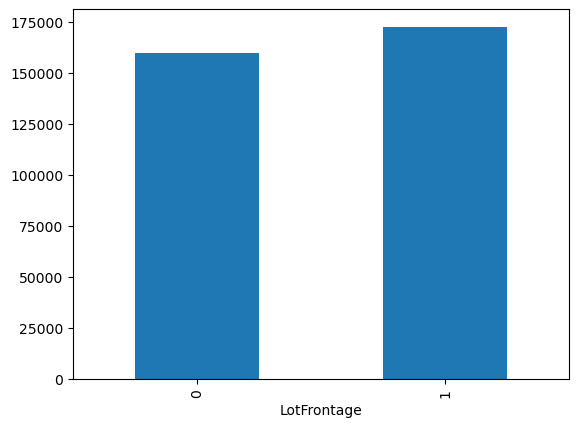

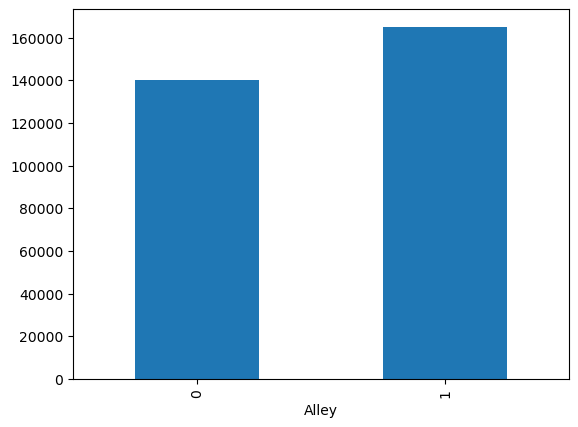

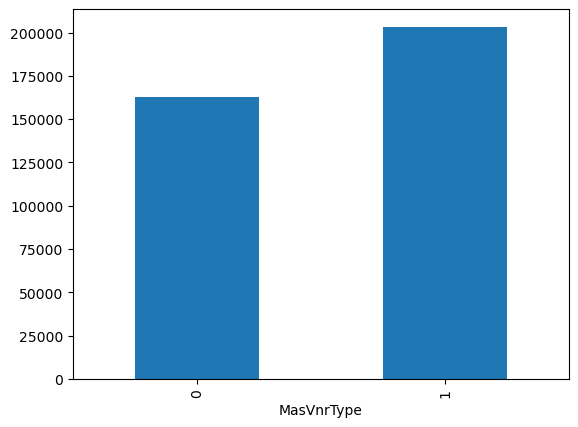

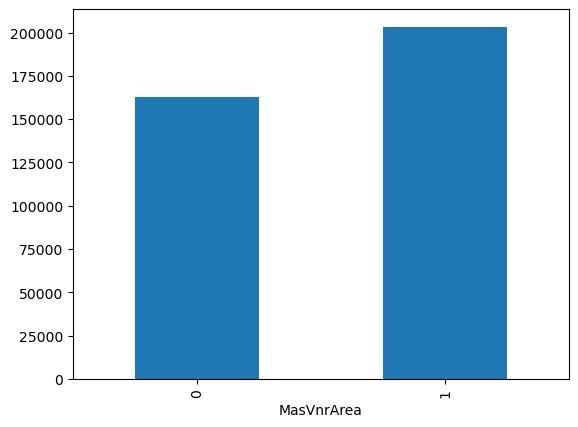

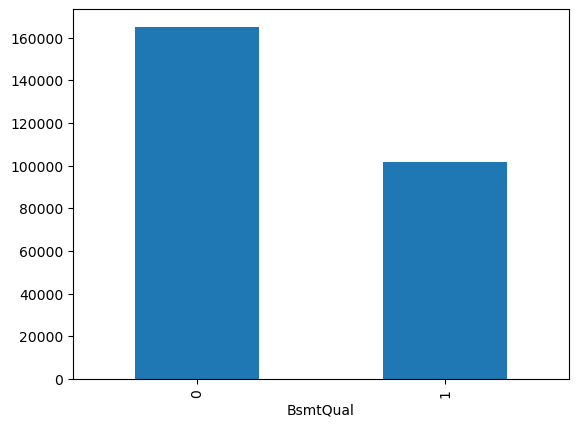

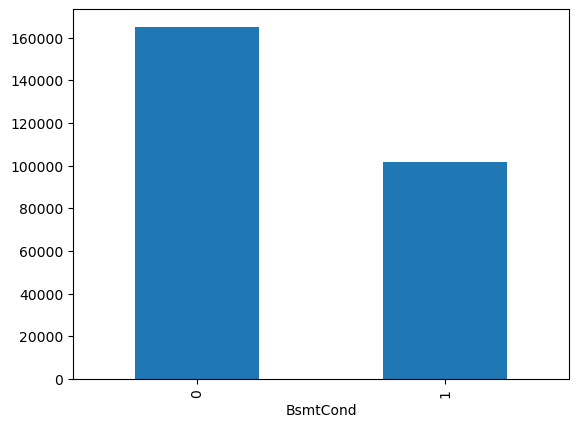

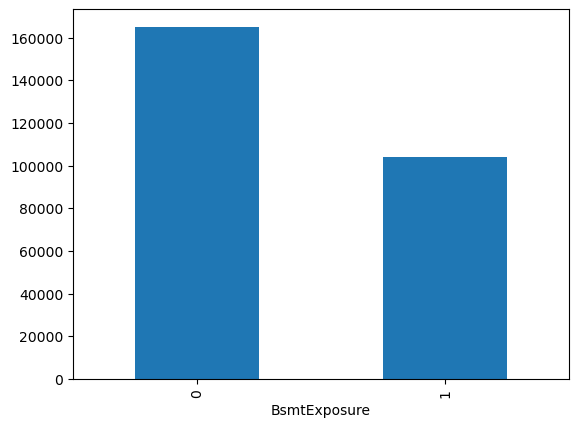

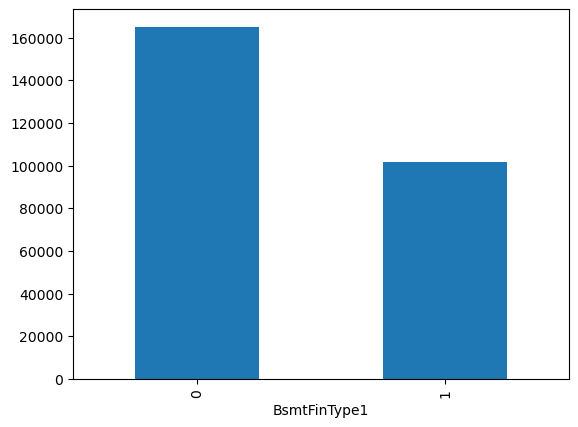

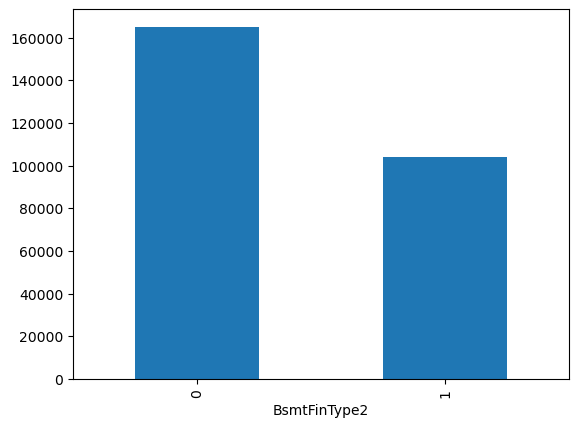

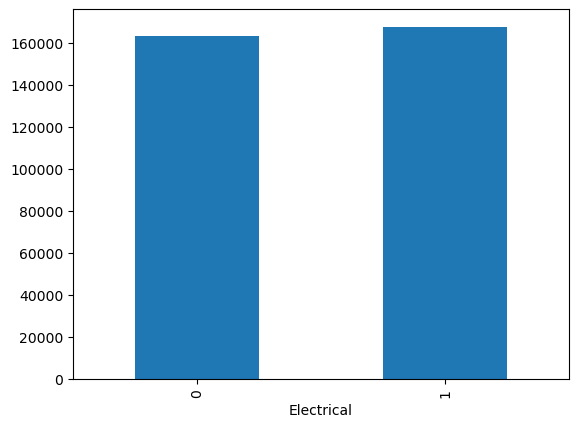

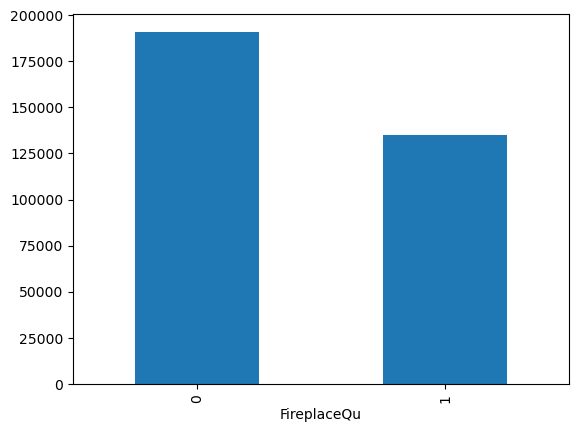

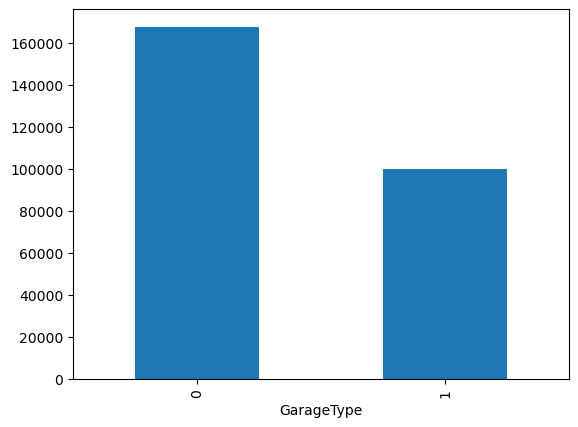

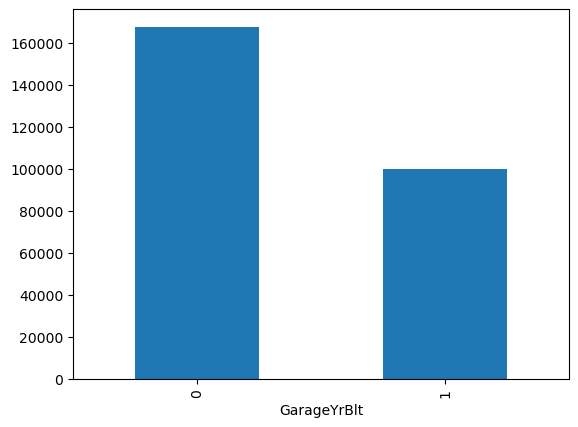

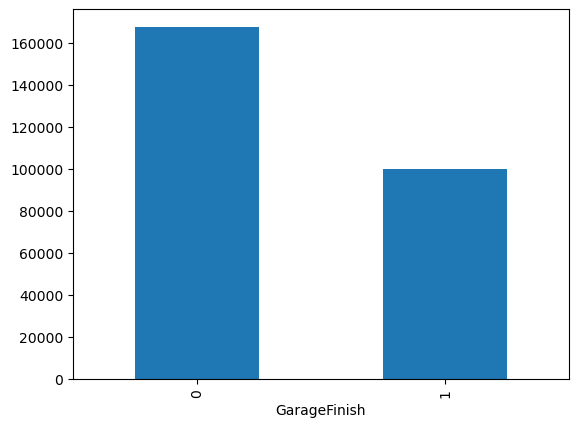

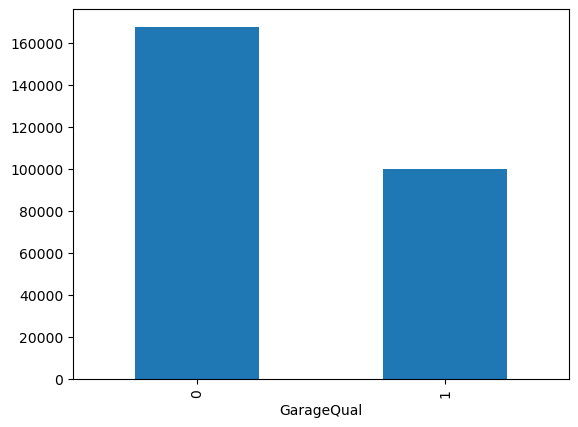

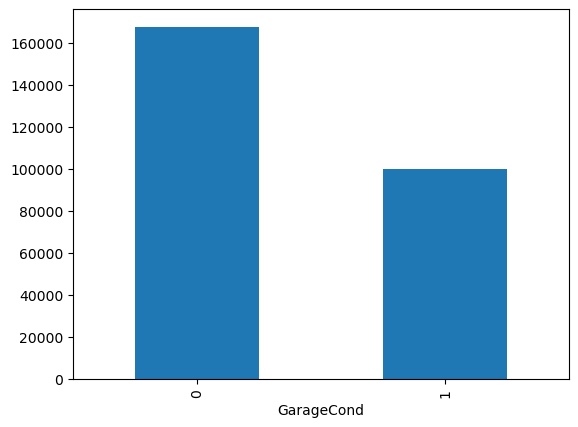

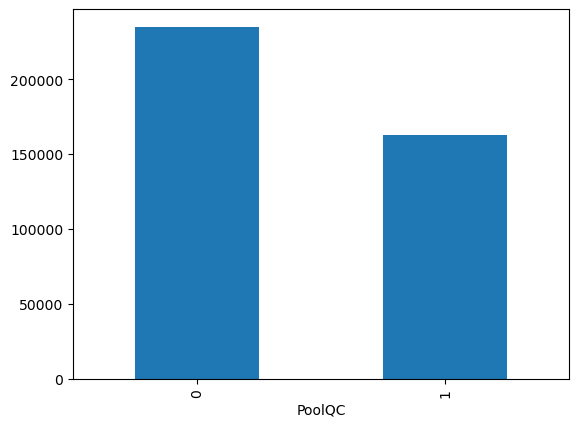

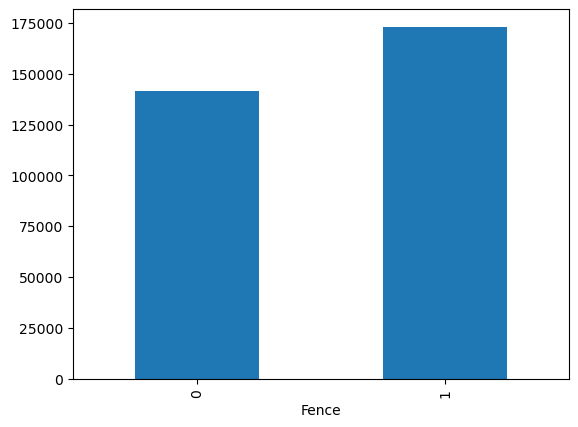

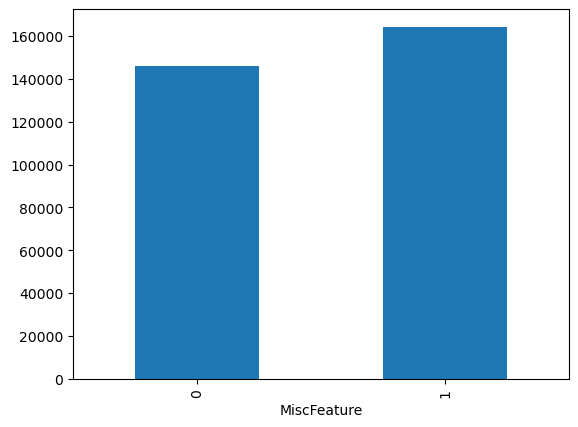

In [5]:
# Our target column is SalePrice ----> let's see the relationship between Missing values and SalePrice.
for feature in feature_with_nan:
    data = df.copy()
    # we create a dummy variable which 1 indicates the presence of missing values and 0 otherwise
    data[feature] = np.where(data[feature].isnull(),1,0)
    # Calculate the mean of saleprice in case of the presence of missings and not
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()



>From previous charts, we can notice that there is a relationship between Missing values and the dependent variable so that we will replace them later with another values in feature engineering

In [6]:
# The dataset contains Numerical and Categorical types. We will divide them.
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

## Numerical Variables

In [7]:
# List of numerical variables
Numerical_features = [feature for feature in df.columns if df[feature].dtypes!= 'O']
print('The number of numerical variables :',len(Numerical_features)) 

The number of numerical variables : 38


In [8]:
df[Numerical_features].head(10)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   
5          1995         0.0         732  ...          40           30   
6          2005       186.0        1369  ...         255           57   
7          1973       240.0         859  ...         235          204   
8          1950         0.0           0  ...          90            0   
9          1950         0.0         851  ...           0            4   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   
5              0        320            0         0      700      10    2009   
6              0          0            0         0        0       8    2007   
7            228          0            0         0      350      11    2009   
8            205          0            0         0        0       4    2008   
9              0          0            0         0        0       1    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  
5     143000  
6     307000  
7     200000  
8     129900  
9     118000  

[10 rows x 38 columns]

In [9]:
Numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

From our Numerical variables we can see that there are some columns containing year information. We create a list for year information. 

In [10]:
year_feature = [feature for feature in Numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
df[year_feature]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          2003          2003       2003.0    2008
1          1976          1976       1976.0    2007
2          2001          2002       2001.0    2008
3          1915          1970       1998.0    2006
4          2000          2000       2000.0    2008
...         ...           ...          ...     ...
1455       1999          2000       1999.0    2007
1456       1978          1988       1978.0    2010
1457       1941          2006       1941.0    2010
1458       1950          1996       1950.0    2010
1459       1965          1965       1965.0    2008

[1460 rows x 4 columns]

Text(0.5, 1.0, 'Saleprice through years')

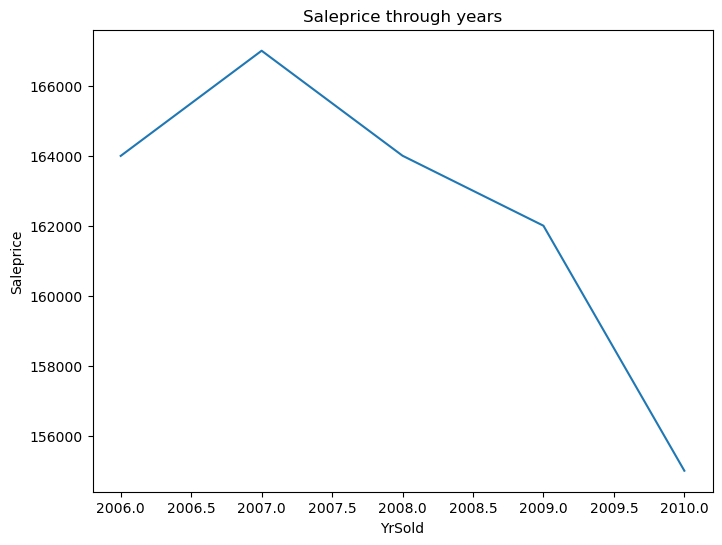

In [12]:
# Let's see how saleprice changes over years 
plt.figure(figsize=(8,6))
df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Saleprice')
plt.title('Saleprice through years')

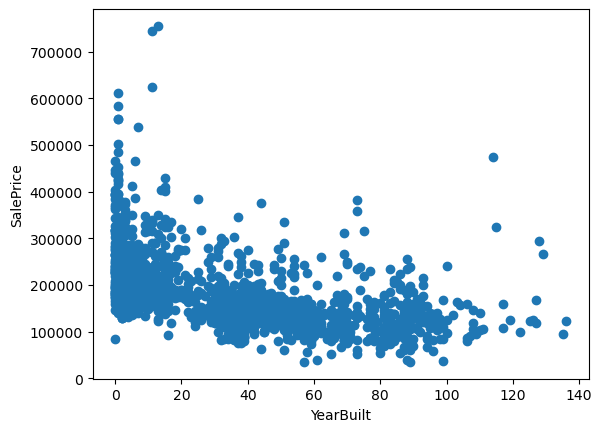

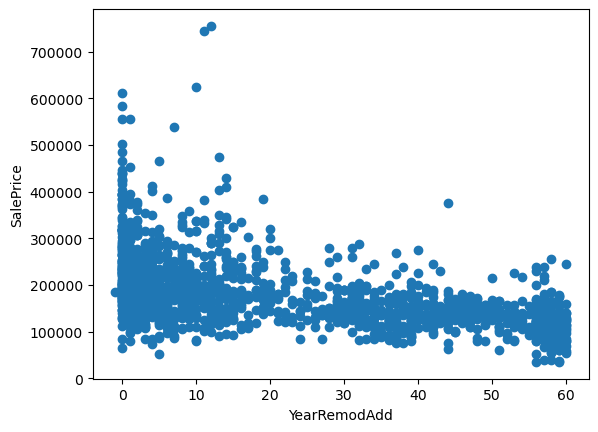

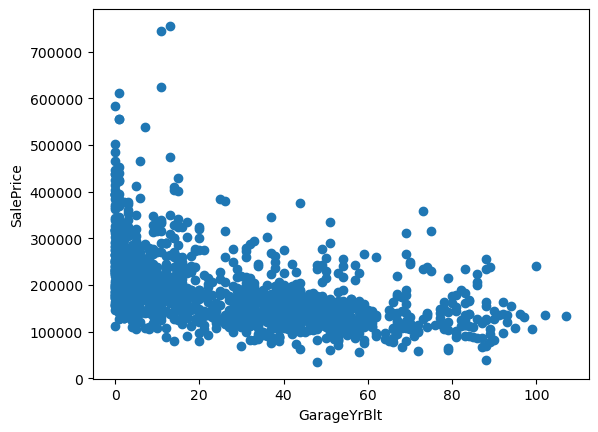

In [13]:
# Let's see the relationship between year features and SalePrice
for feature in year_feature:
    if feature != 'YrSold':    
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

>From the first graph we notice that over time the price of the houses decreases.

<Axes: >

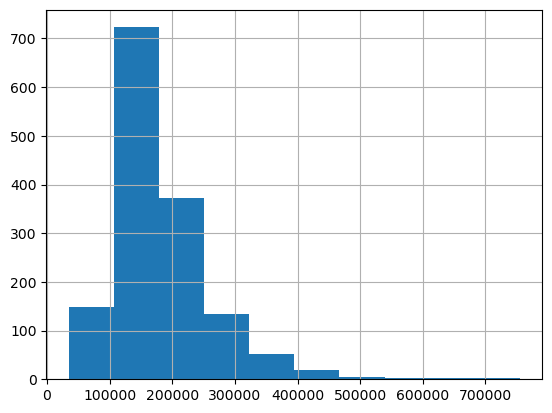

In [14]:
# Let's see the target column distribution
df['SalePrice'].hist()

> The target column is right skewed for this we will do transformations in feature engineering

#### Since we have 38 numerical column we will divide it into discrete and continous columns 

In [15]:
# We fixed 25 as a threshold for dividing continous and discrete columns
discreste_features = [feature for feature in Numerical_features if len(df[feature].unique()) < 25 and feature not in year_feature+['Id']]
print('The number of discrete features :{}'.format(len(discreste_features)))

The number of discrete features :17


In [16]:
df[discreste_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

#### The relationship between the discrete values and the target columns

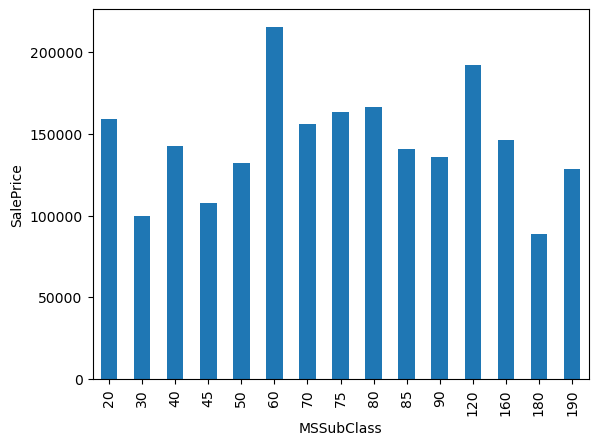

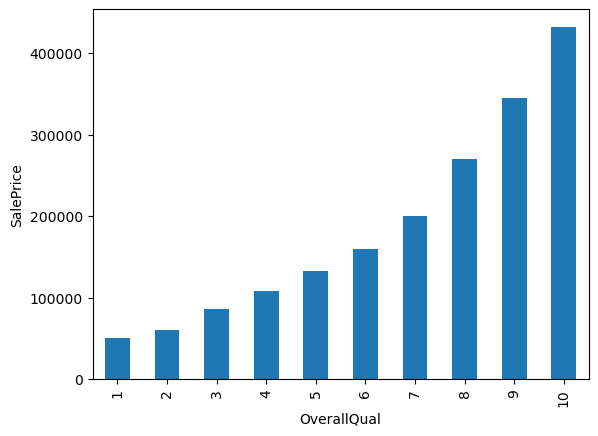

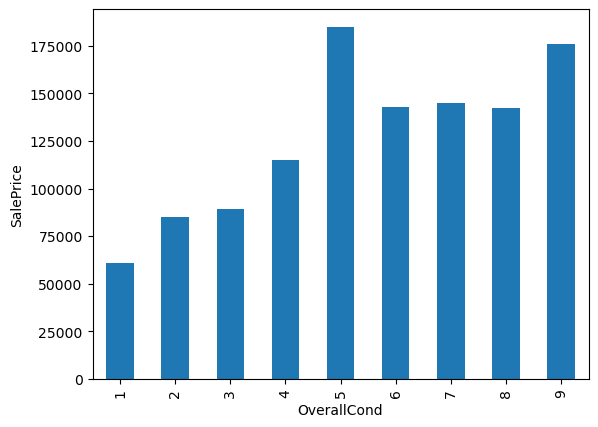

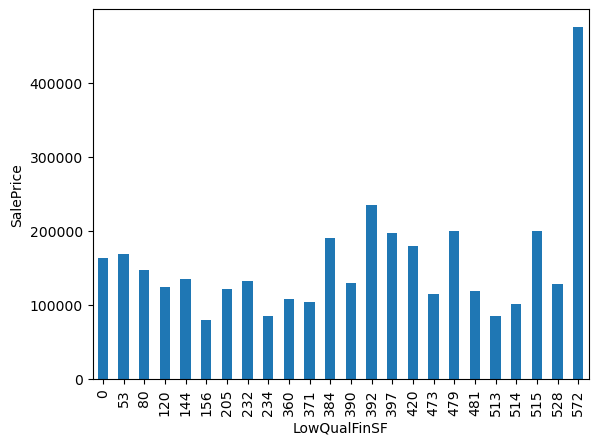

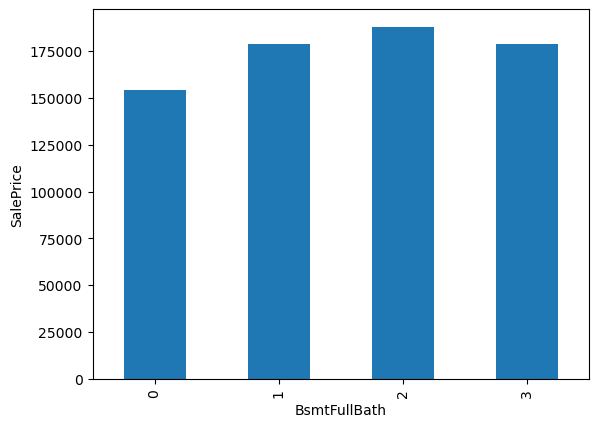

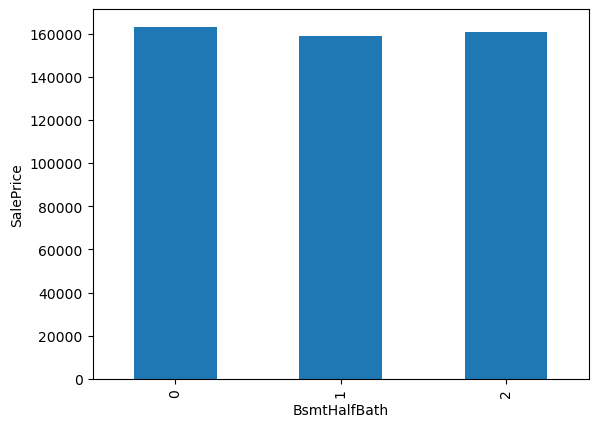

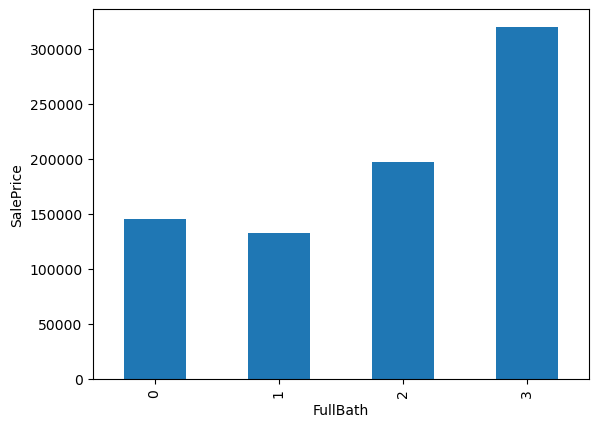

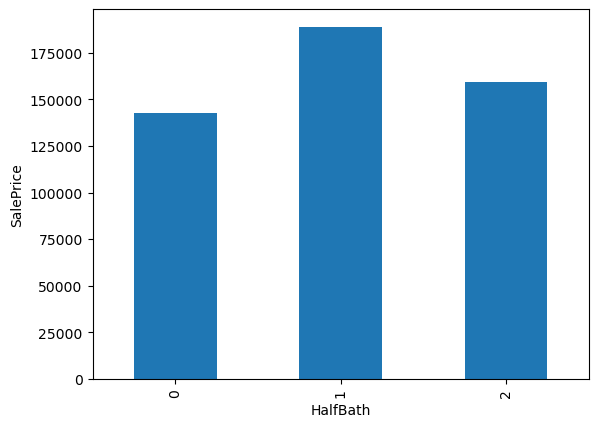

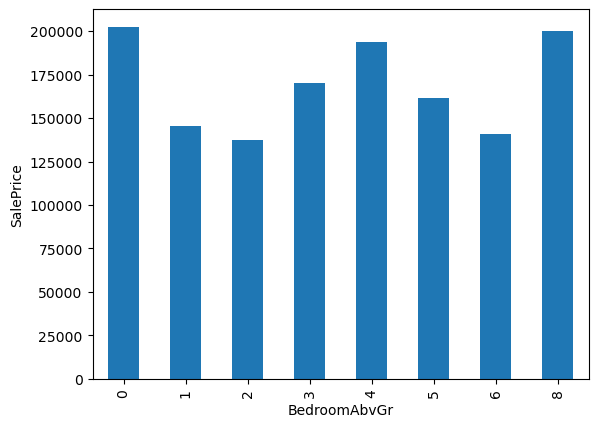

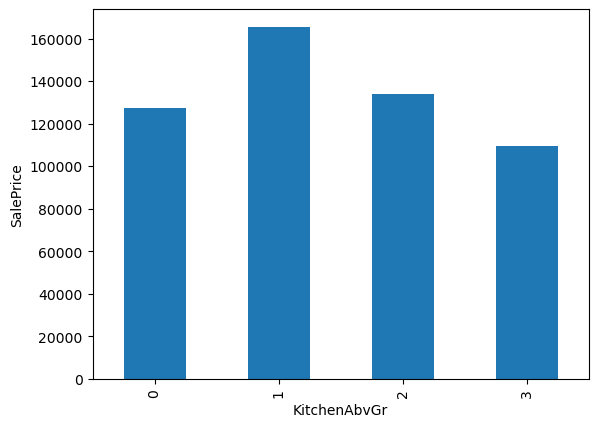

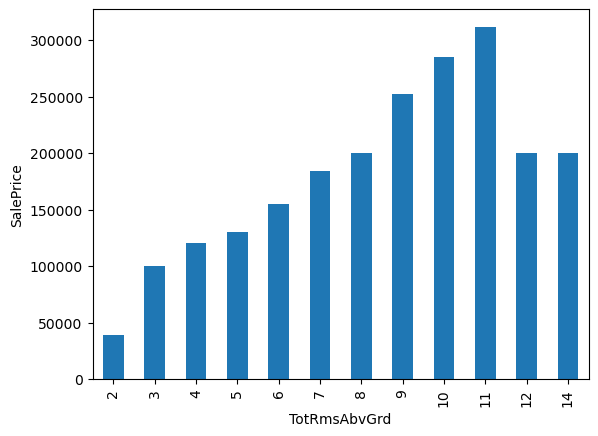

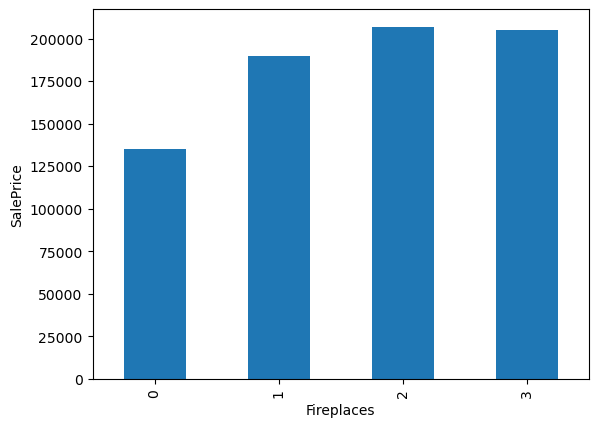

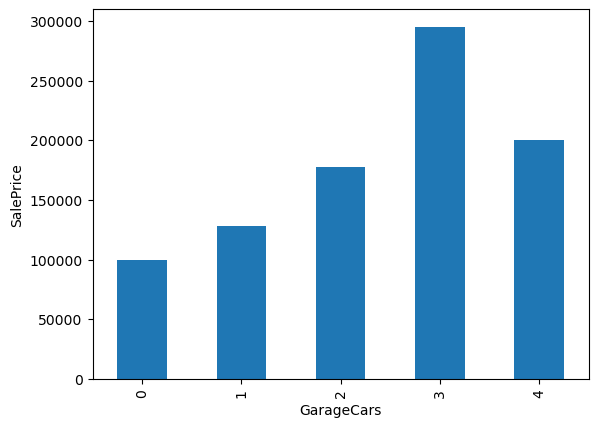

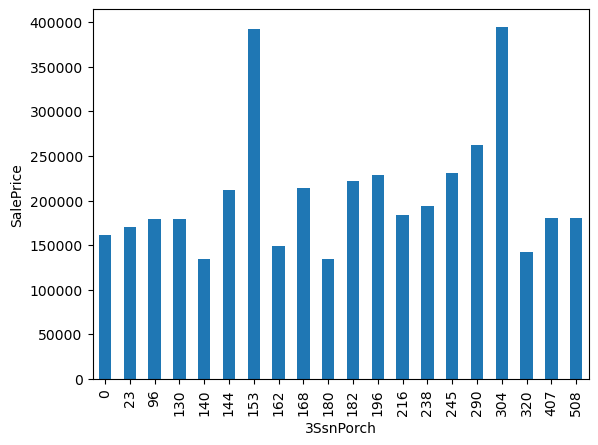

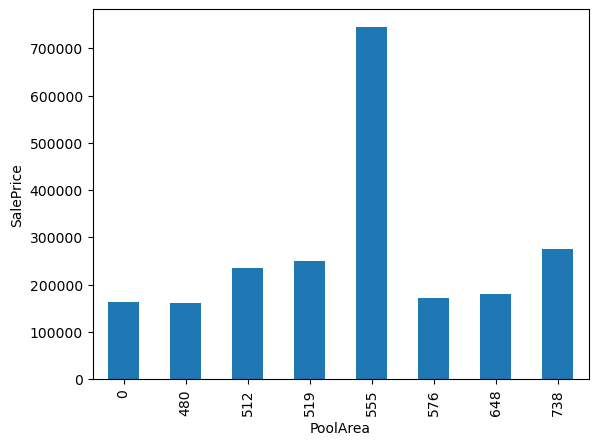

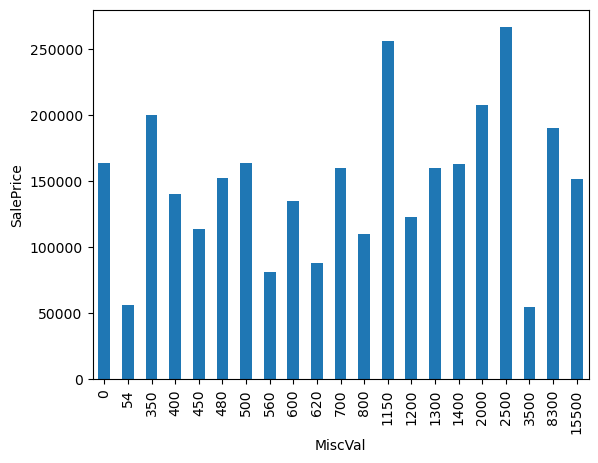

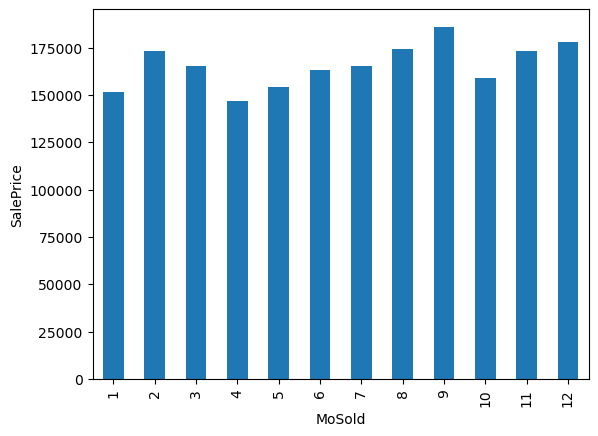

In [17]:
for feature in discreste_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.show()

In [18]:
# Continous Variables
continous_features = [feature for feature in Numerical_features if feature not in discreste_features+year_feature+['Id']]
print('The number of continous variables :{}'.format(len(continous_features)))

The number of continous variables :16


In [19]:
df[continous_features].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

#### The distribution of continous columns

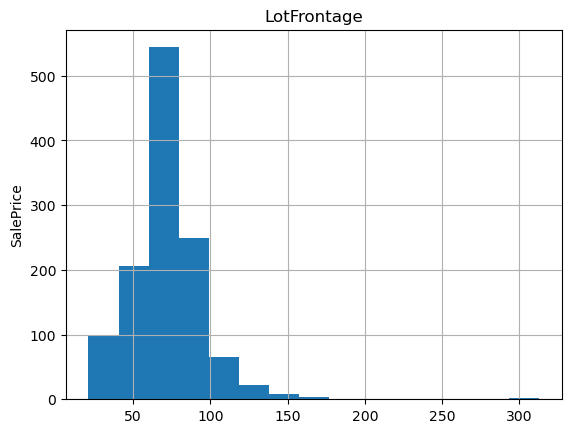

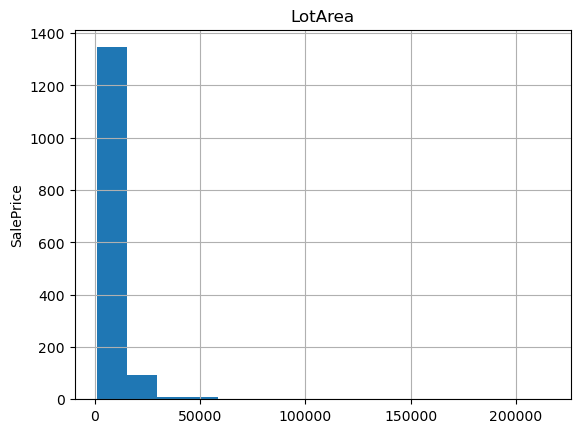

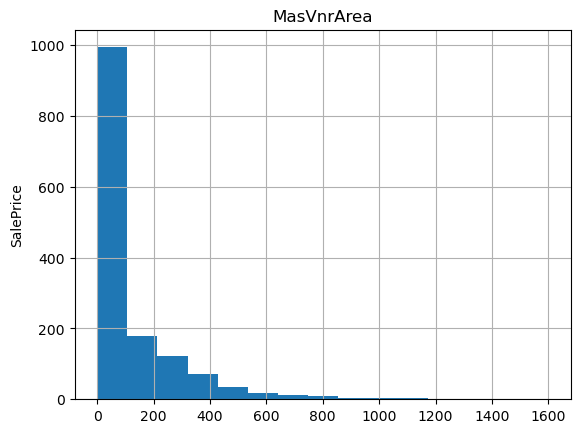

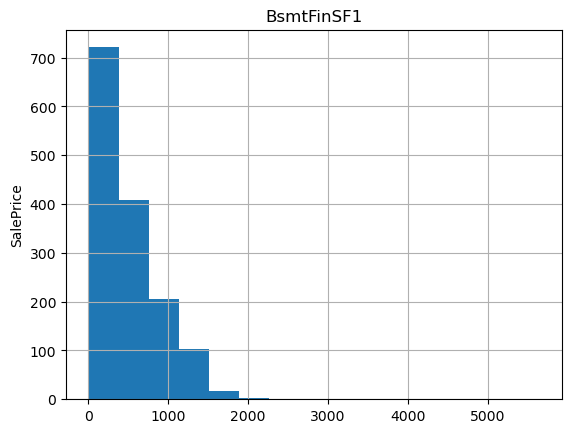

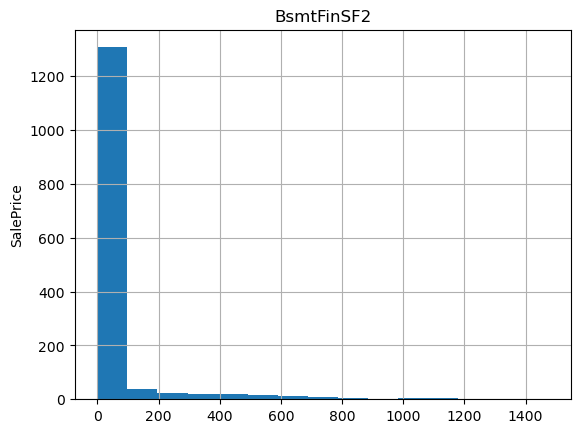

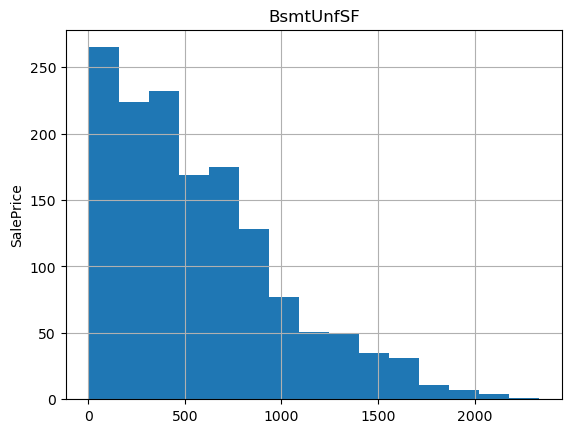

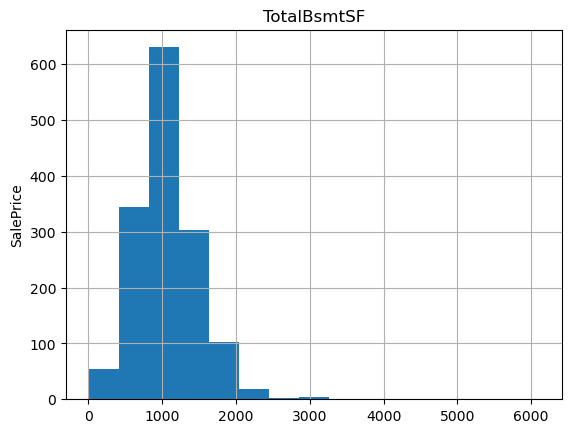

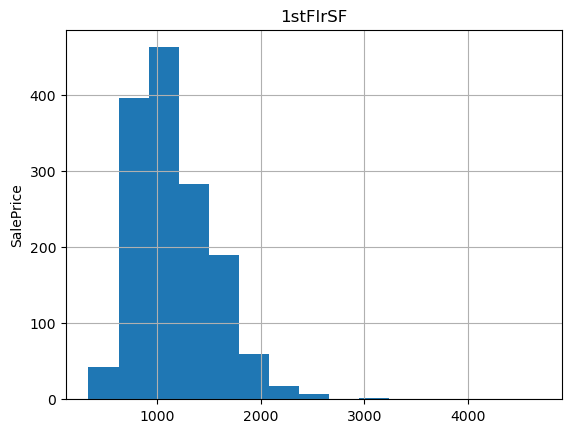

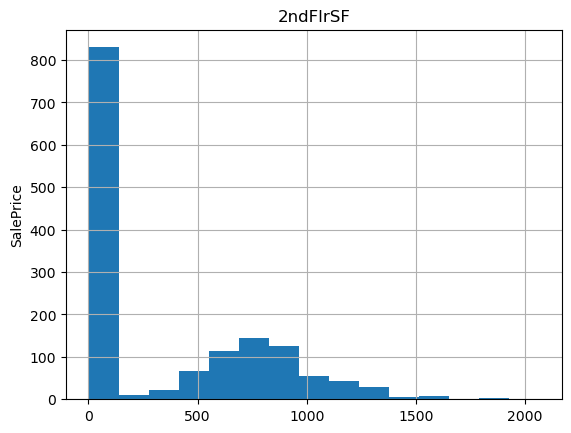

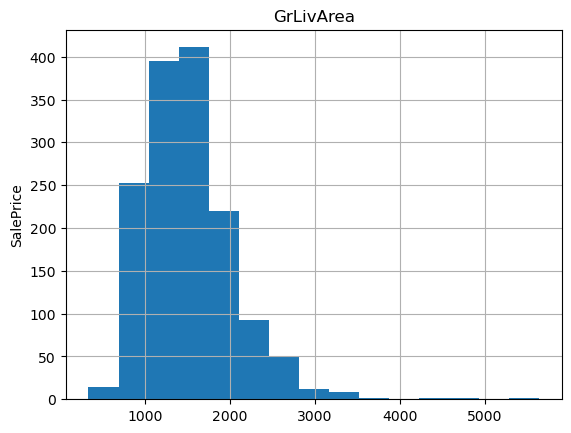

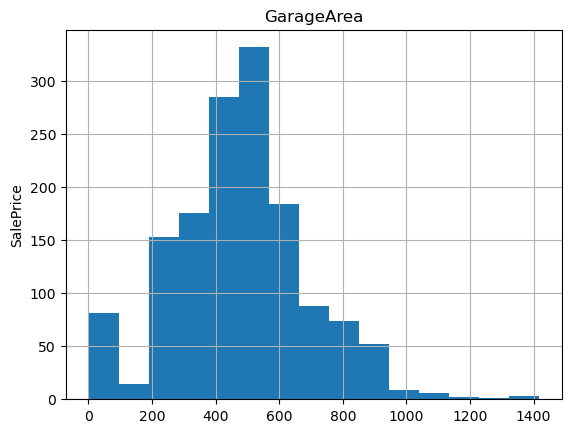

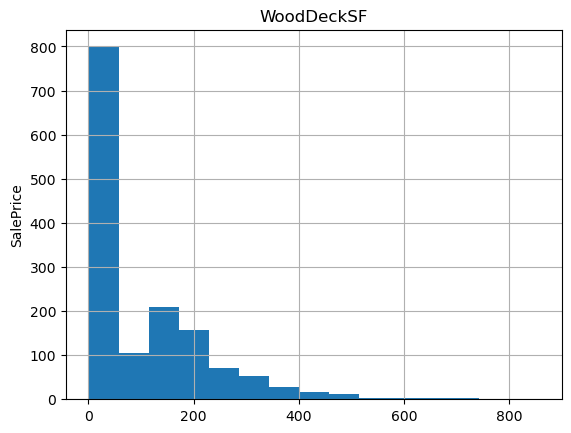

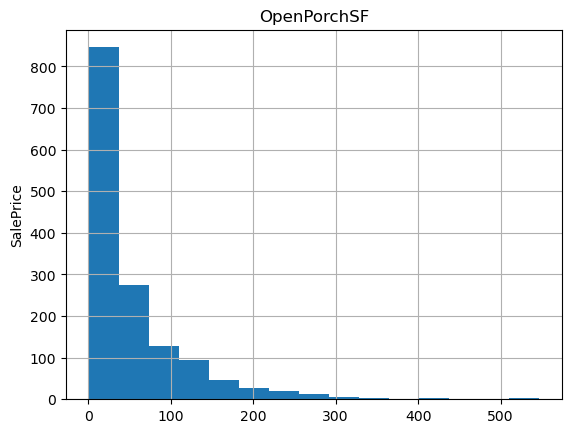

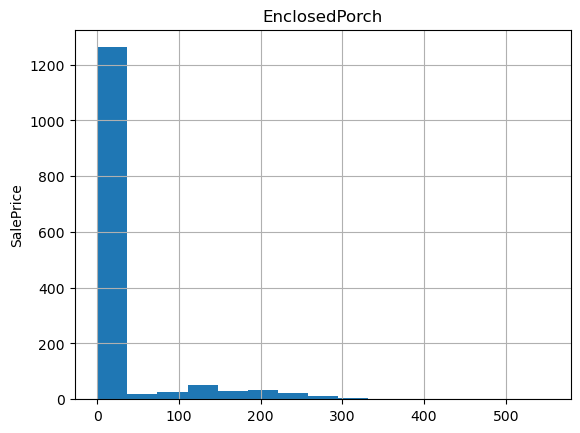

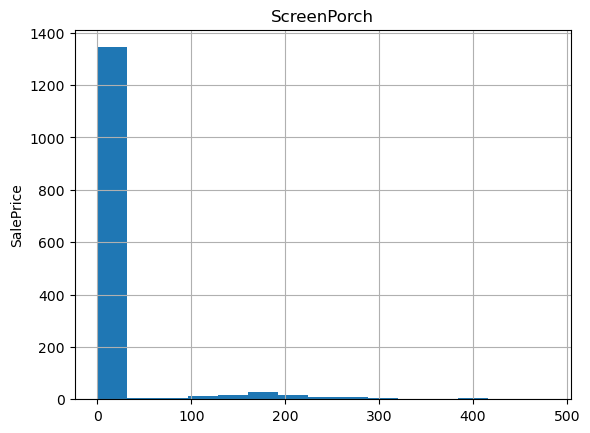

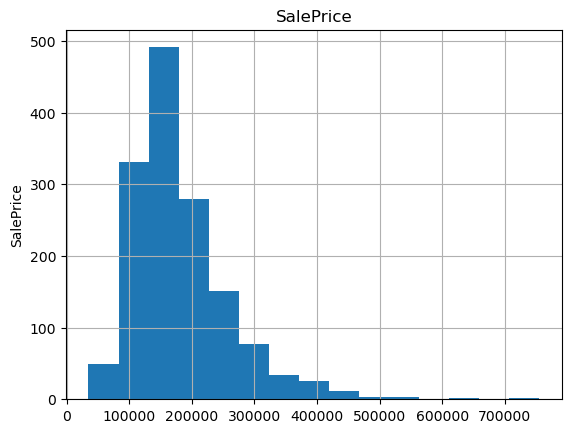

In [20]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins=15)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

> We can note that all continous features not normaly distributed hence, we will do log transformation.

## Categorical features 

In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical fetaure :{}'.format(len(categorical_features)))

Number of categorical fetaure :43


In [22]:
for feature in categorical_features:
    print('The feature is {} and categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and categories are 5
The feature is Street and categories are 2
The feature is Alley and categories are 3
The feature is LotShape and categories are 4
The feature is LandContour and categories are 4
The feature is Utilities and categories are 2
The feature is LotConfig and categories are 5
The feature is LandSlope and categories are 3
The feature is Neighborhood and categories are 25
The feature is Condition1 and categories are 9
The feature is Condition2 and categories are 8
The feature is BldgType and categories are 5
The feature is HouseStyle and categories are 8
The feature is RoofStyle and categories are 6
The feature is RoofMatl and categories are 8
The feature is Exterior1st and categories are 15
The feature is Exterior2nd and categories are 16
The feature is MasVnrType and categories are 5
The feature is ExterQual and categories are 4
The feature is ExterCond and categories are 5
The feature is Foundation and categories are 6
The feature is BsmtQual and 

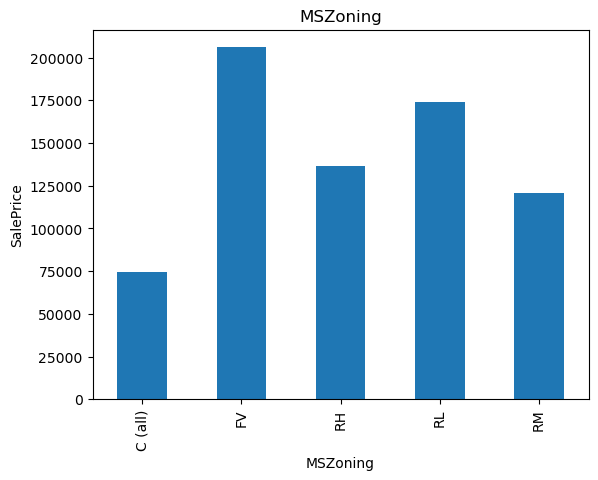

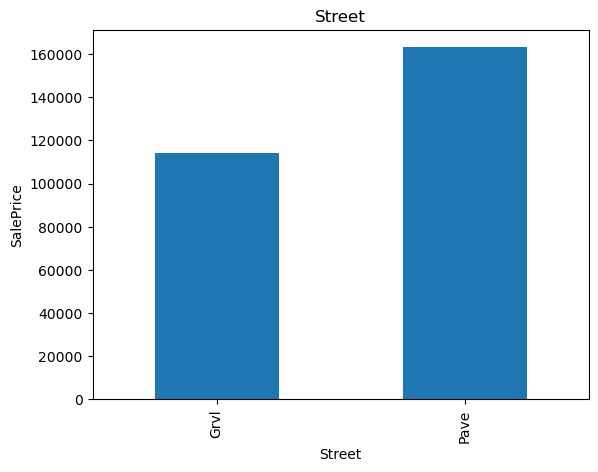

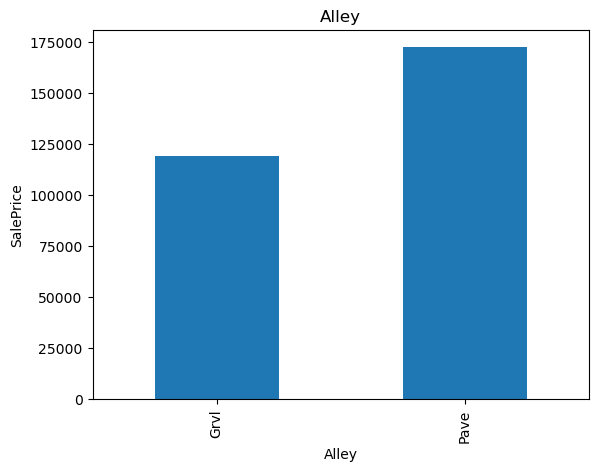

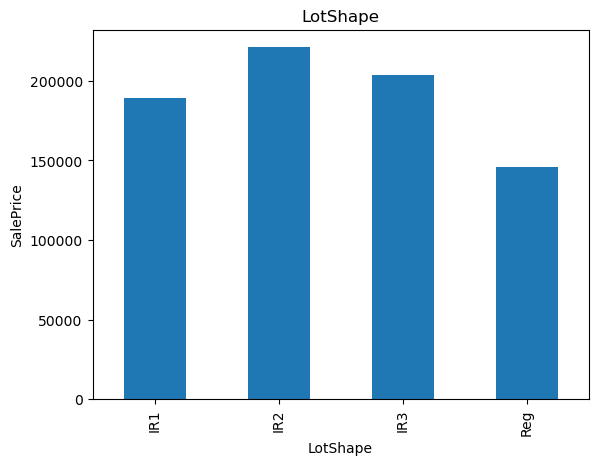

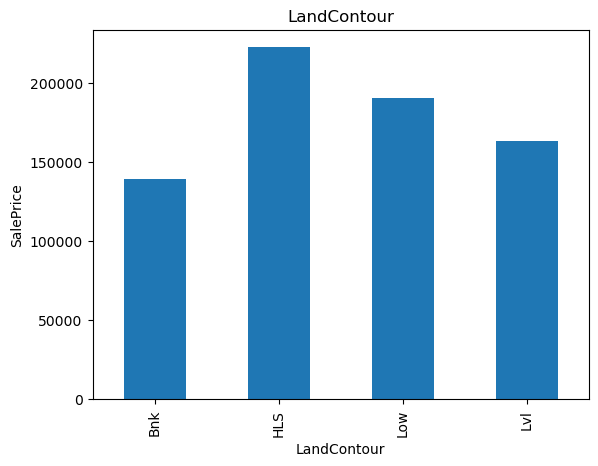

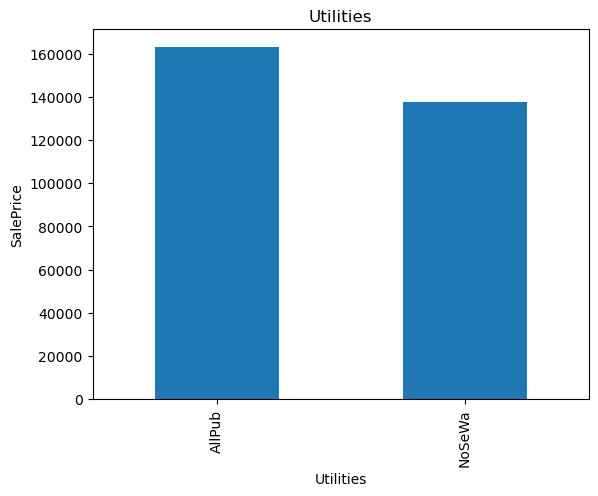

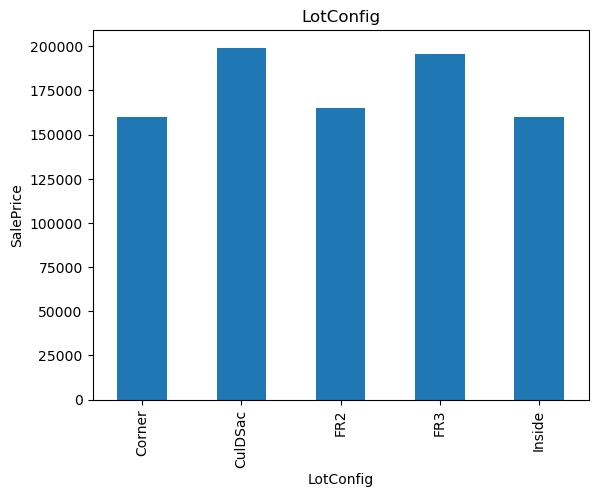

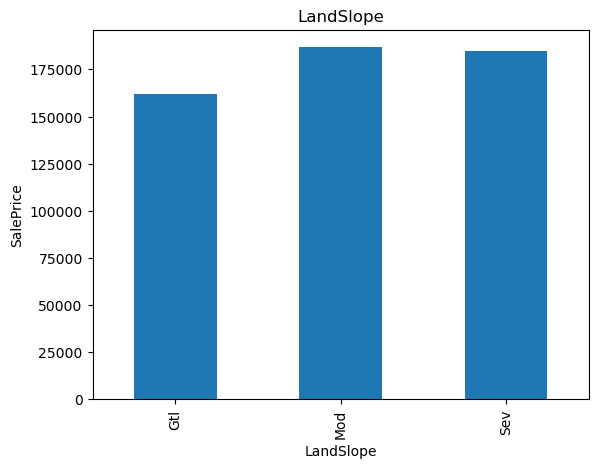

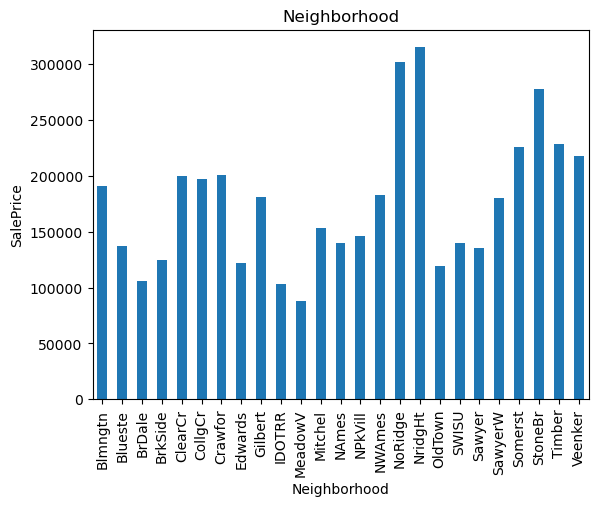

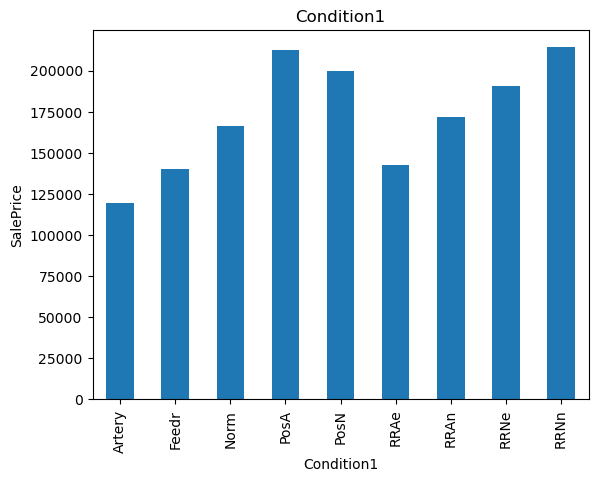

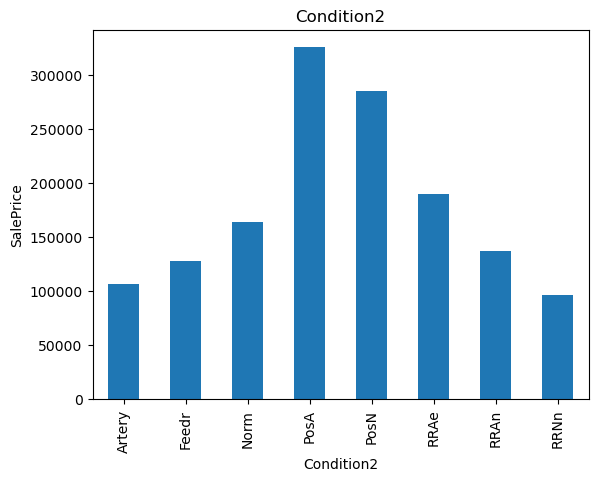

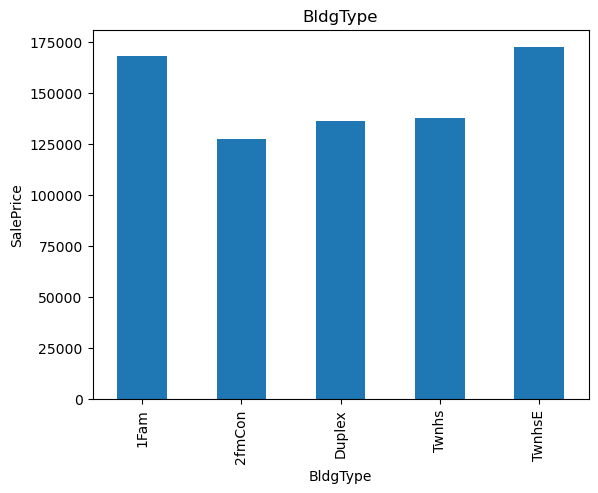

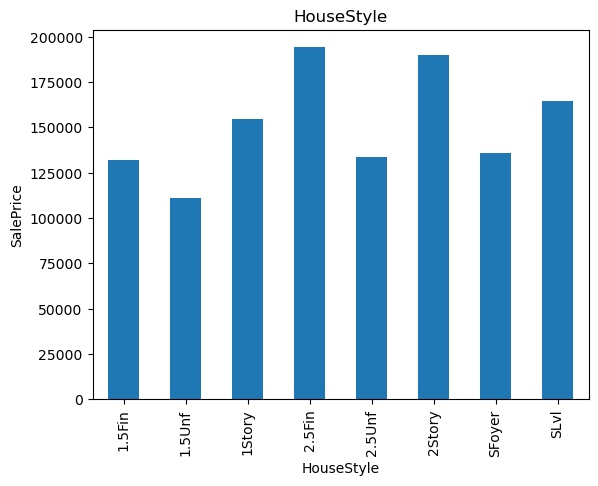

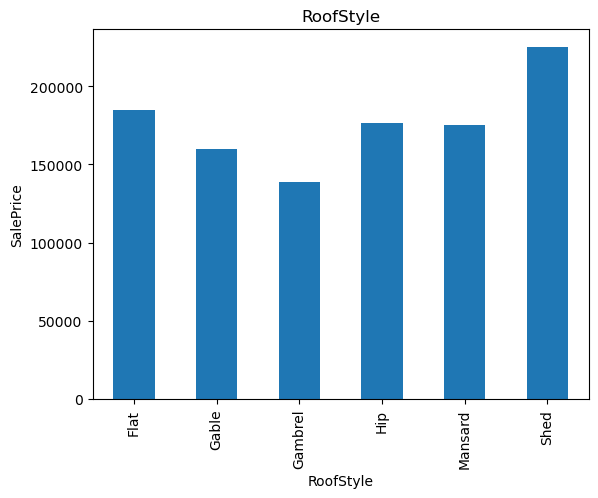

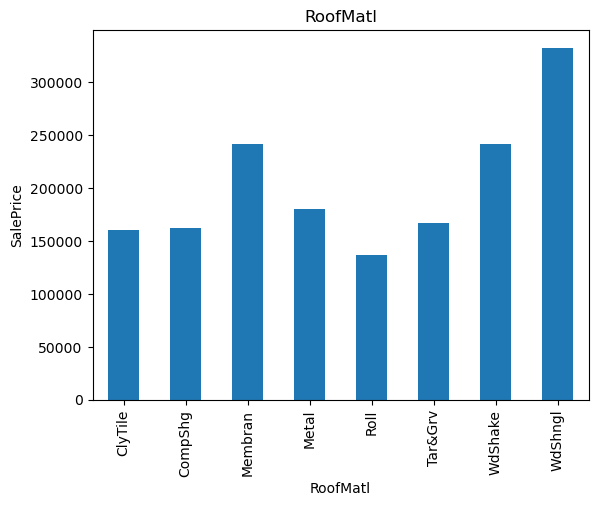

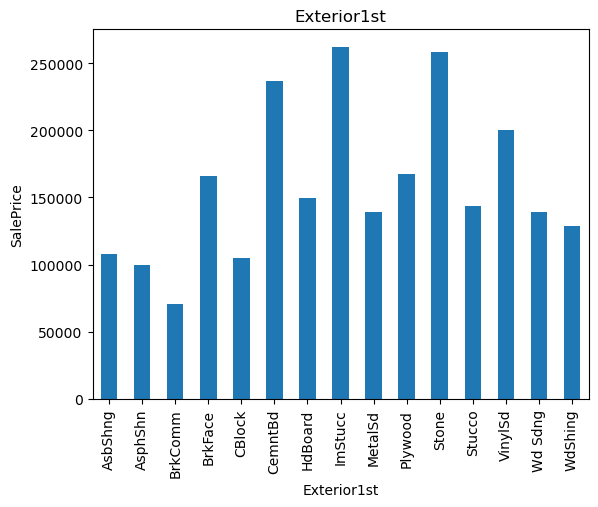

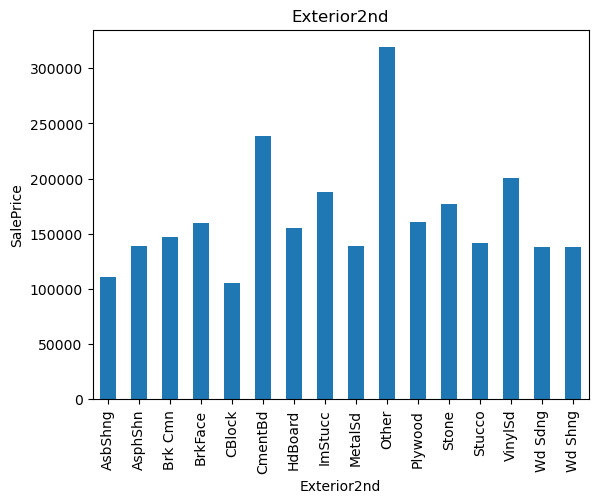

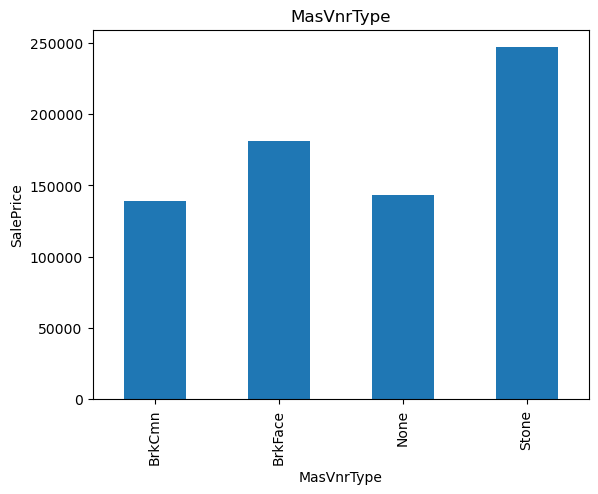

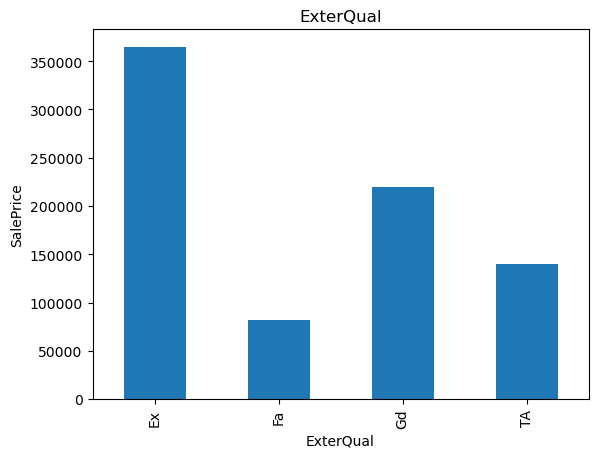

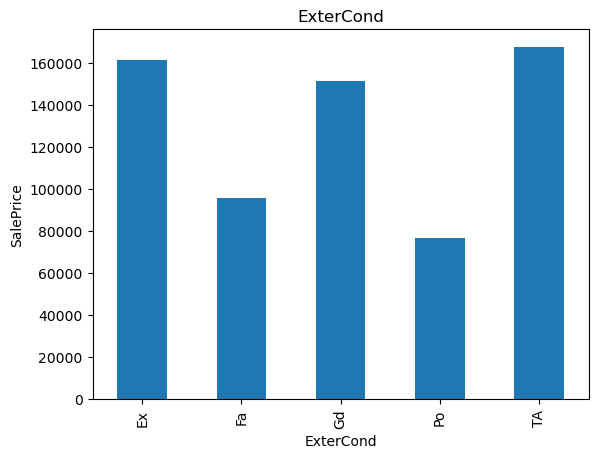

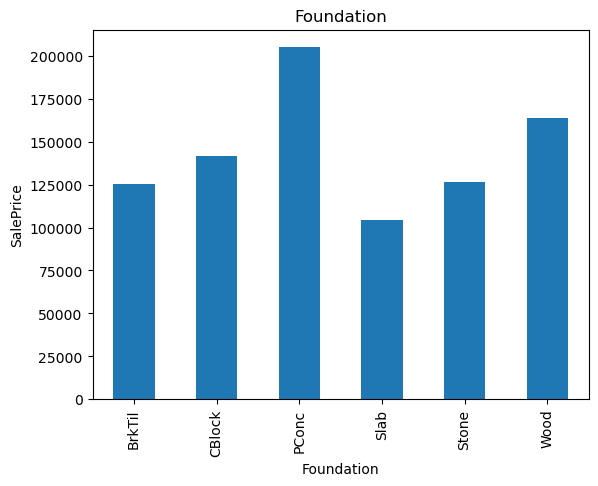

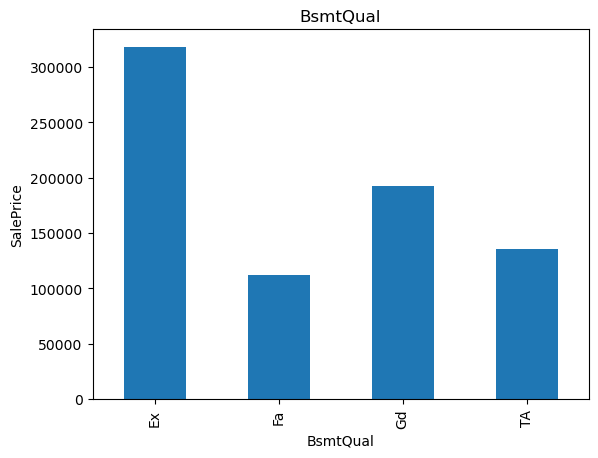

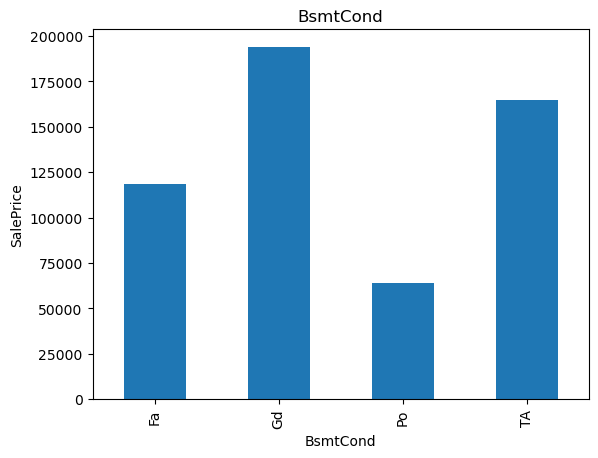

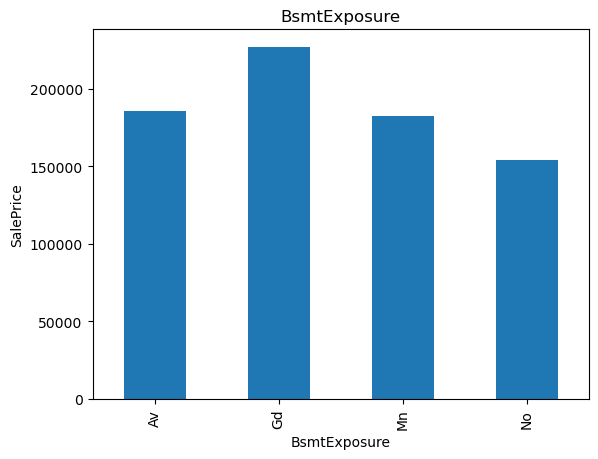

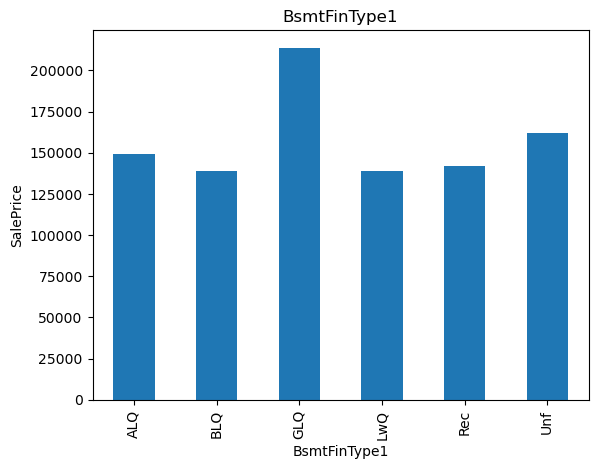

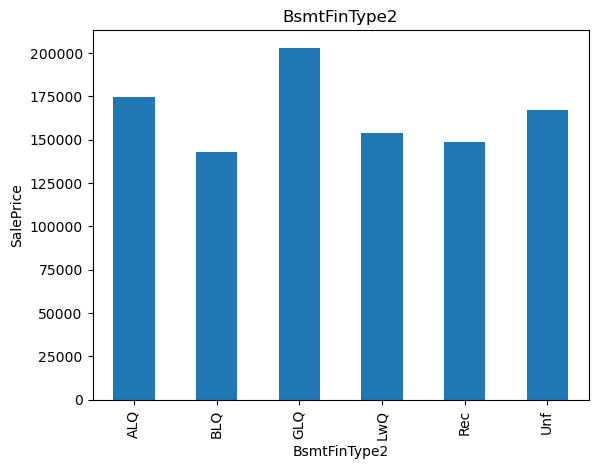

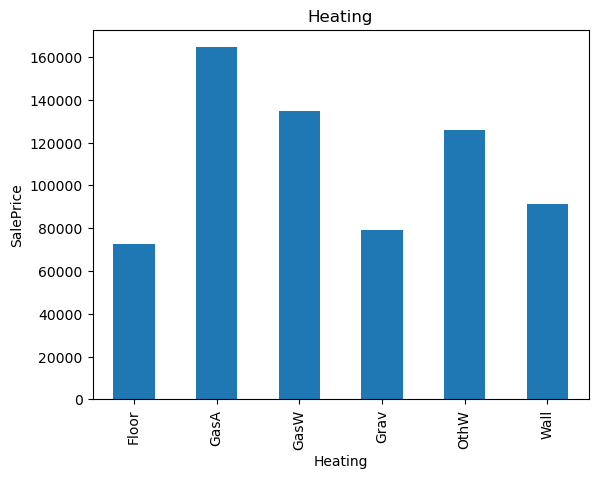

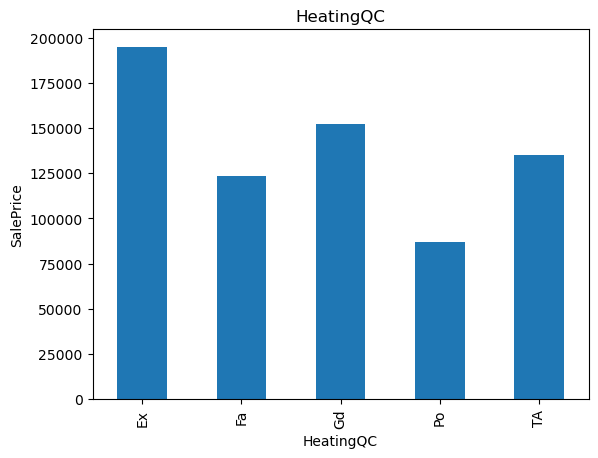

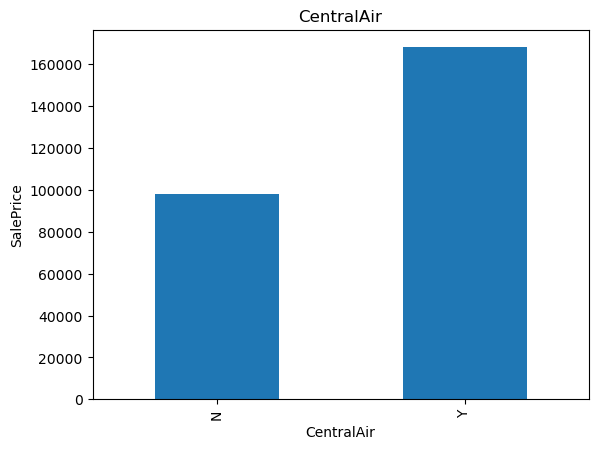

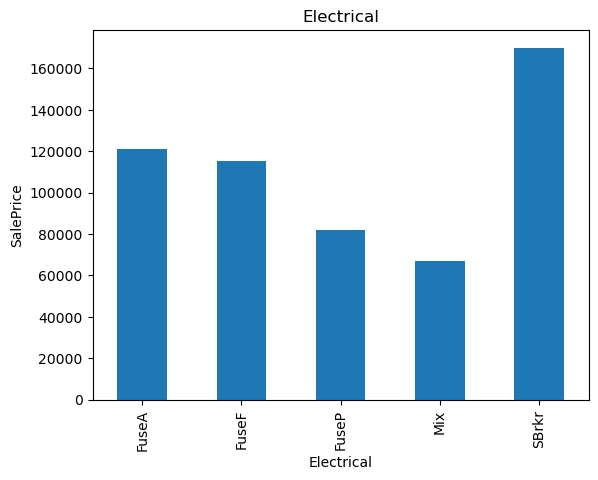

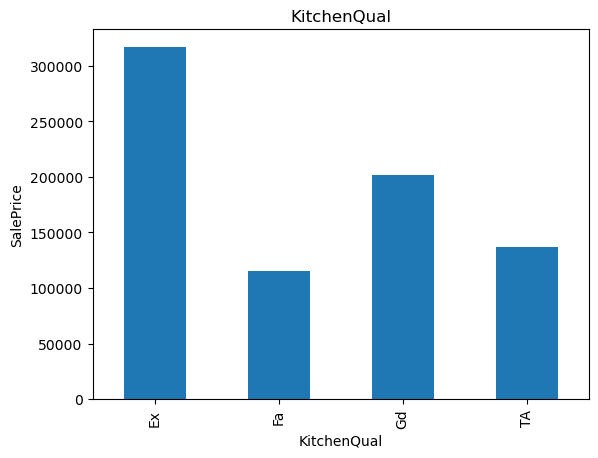

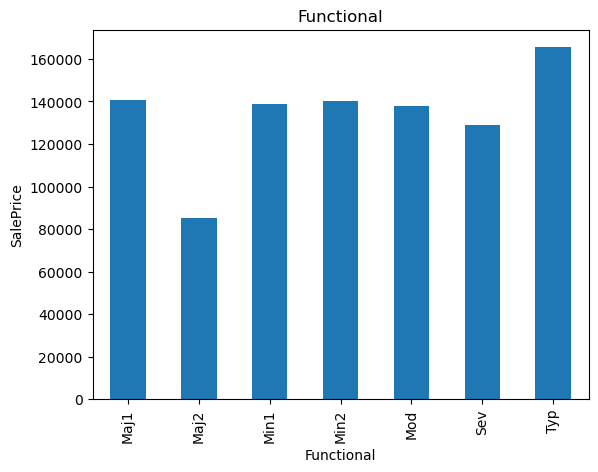

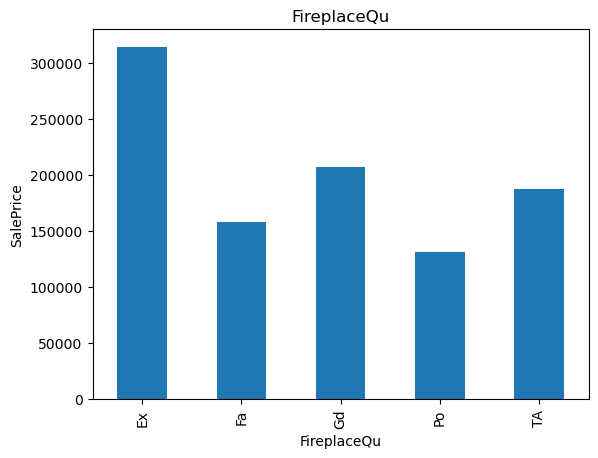

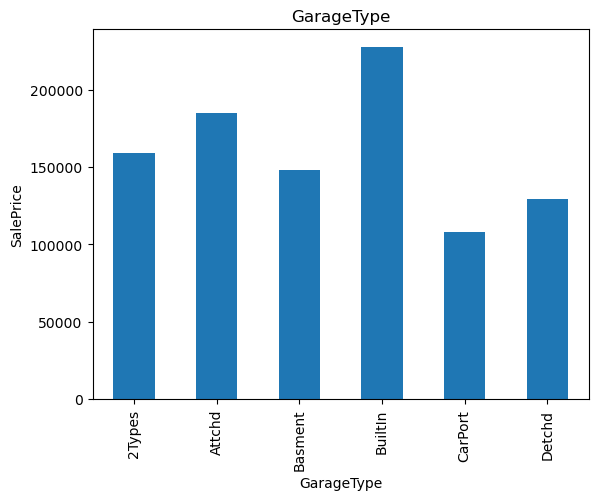

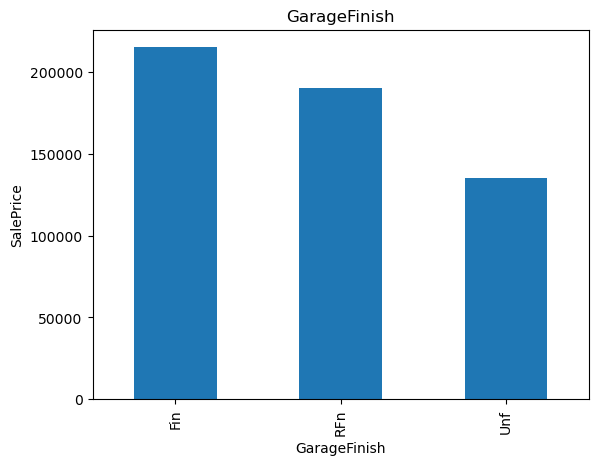

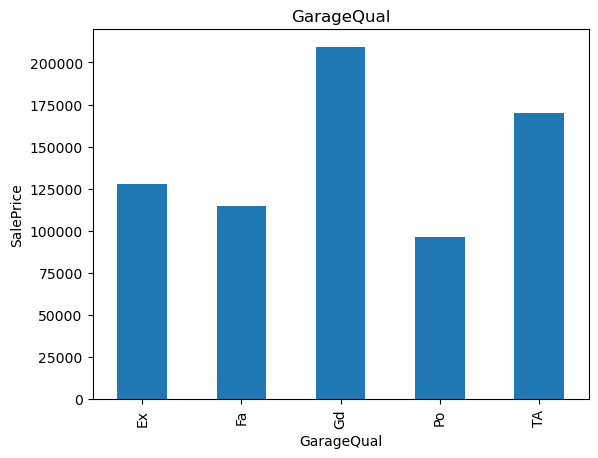

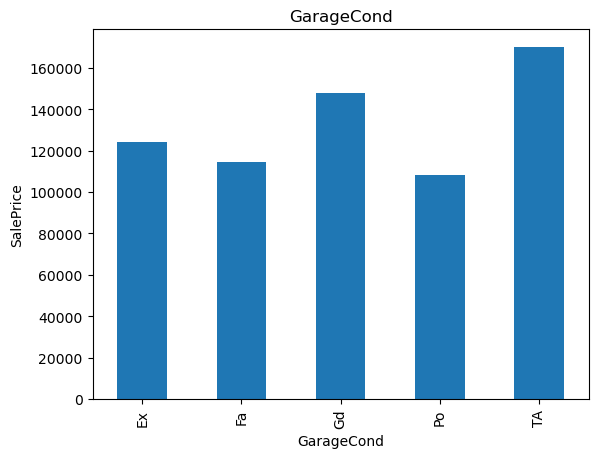

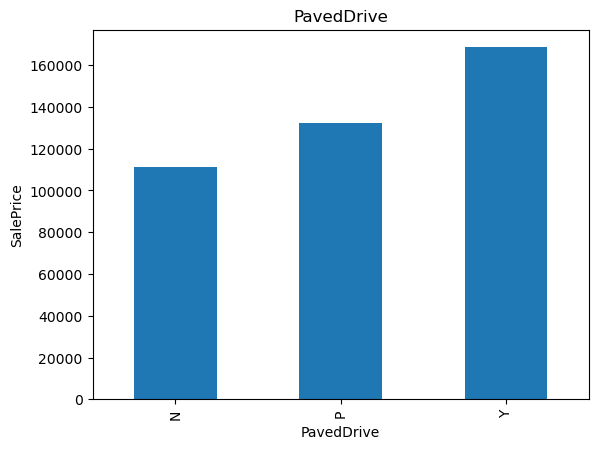

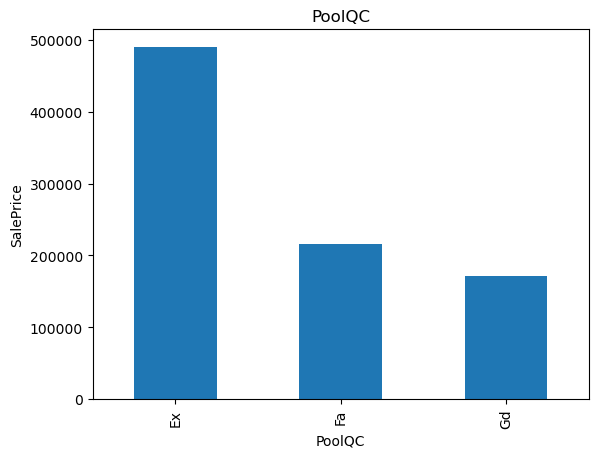

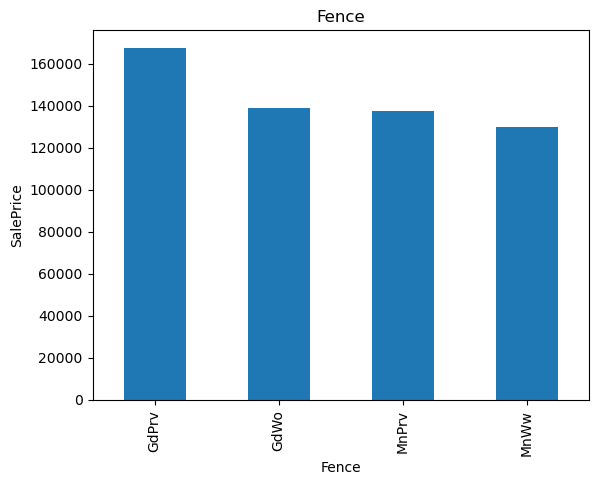

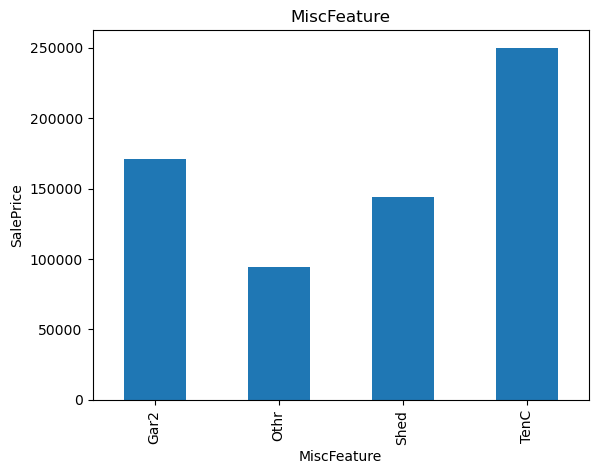

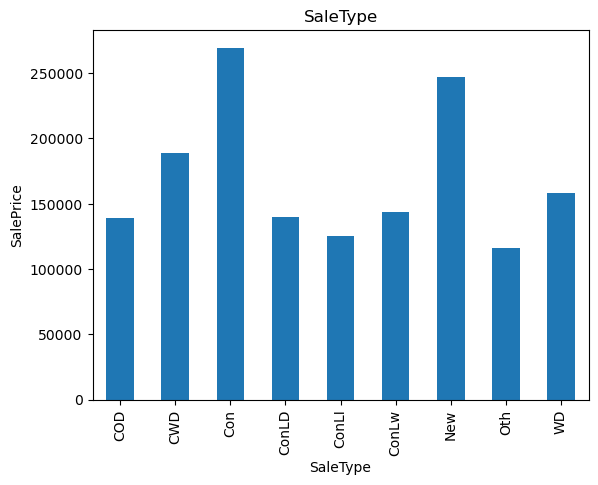

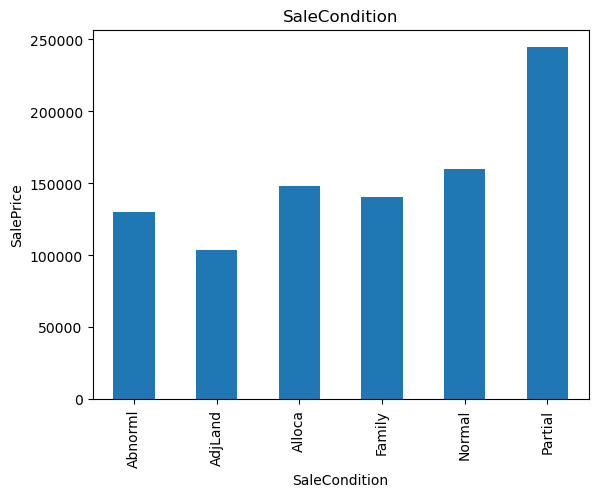

In [23]:
# Let's examine the relationship between categorical features and SalePrice
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Feature Engineering

### Missing values

In [24]:
df = pd.read_csv('train.csv')

In [25]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [26]:
# Let's handle missing values in categorical features
categorical_features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes == 'O']

for feature in categorical_features_nan:
    print('{}:{}% Missing values'.format(feature,round(df[feature].isnull().mean(),4)))


Alley:0.9377% Missing values
MasVnrType:0.0055% Missing values
BsmtQual:0.0253% Missing values
BsmtCond:0.0253% Missing values
BsmtExposure:0.026% Missing values
BsmtFinType1:0.0253% Missing values
BsmtFinType2:0.026% Missing values
Electrical:0.0007% Missing values
FireplaceQu:0.4726% Missing values
GarageType:0.0555% Missing values
GarageFinish:0.0555% Missing values
GarageQual:0.0555% Missing values
GarageCond:0.0555% Missing values
PoolQC:0.9952% Missing values
Fence:0.8075% Missing values
MiscFeature:0.963% Missing values


In [27]:
# Replacing the nan values with new label
def replace_cat_feature(df,categorical_features_nan):
    data = df.copy()
    data[categorical_features_nan] = data[categorical_features_nan].fillna('Missing')
    return data
df = replace_cat_feature(df,categorical_features_nan)

In [28]:
df[categorical_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [29]:
# Let's check Numerical values
numerical_features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtypes != 'O']

for feature in numerical_features_nan:
    print('{}:{}% Missing values'.format(feature,round(df[feature].isnull().mean(),4)))



LotFrontage:0.1774% Missing values
MasVnrArea:0.0055% Missing values
GarageYrBlt:0.0555% Missing values


In [30]:
for feature in numerical_features_nan:
    median_values = df[feature].median()
    # we create a new feature to capture nan values
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_values,inplace=True)

In [31]:
df[numerical_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [32]:
df.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   

   LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0          Lvl    AllPub  ...     Missing       0      2   2008       WD   
1          Lvl    AllPub  ...     Missing       0      5   2007       WD   
2          Lvl    AllPub  ...     Missing       0      9   2008       WD   
3          Lvl    AllPub  ...     Missing       0      2   2006       WD   
4          Lvl    AllPub  ...     Missing       0     12   2008       WD   
5          Lvl    AllPub  ...        Shed     700     10   2009       WD   
6          Lvl    AllPub  ...     Missing       0      8   2007       WD   
7          Lvl    AllPub  ...        Shed     350     11   2009       WD   
8          Lvl    AllPub  ...     Missing       0      4   2008       WD   
9          Lvl    AllPub  ...     Missing       0      1   2008       WD   
10         Lvl    AllPub  ...     Missing       0      2   2008       WD   
11         Lvl    AllPub  ...     Missing       0      7   2006      New   
12         Lvl    AllPub  ...     Missing       0      9   2008       WD   
13         Lvl    AllPub  ...     Missing       0      8   2007      New   
14         Lvl    AllPub  ...     Missing       0      5   2008       WD   
15         Lvl    AllPub  ...     Missing       0      7   2007       WD   
16         Lvl    AllPub  ...        Shed     700      3   2010       WD   
17         Lvl    AllPub  ...        Shed     500     10   2006       WD   
18         Lvl    AllPub  ...     Missing       0      6   2008       WD   
19         Lvl    AllPub  ...     Missing       0      5   2009      COD   

   SaleCondition SalePrice  LotFrontagenan  MasVnrAreanan  GarageYrBltnan  
0         Normal    208500               0              0               0  
1         Normal    181500               0              0               0  
2         Normal    223500               0              0               0  
3        Abnorml    140000               0              0               0  
4         Normal    250000               0              0               0  
5         Normal    143000               0              0               0  
6         Normal    307000               0              0               0  
7         Normal    200000               1              0               0  
8        Abnorml    129900               0              0               0  
9       

### Temporal variables

In [33]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]

In [34]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

### Encoding categorical columns

#### We will use the target guided ordinal encoding that transform categorical columns into ordinal variables based on their relationship with the target column. 
1- Calculate the mean of the target column for each category.
2- Order the categories.
3- Assign ordinal values for each category.

In [35]:
len(categorical_features)

43

In [36]:
for feature in categorical_features:
    ordered_label = df.groupby(feature)['SalePrice'].mean().sort_values().index
    ordered_label = {k:i for i,k in enumerate(ordered_label)}
    df[feature] = df[feature].map(ordered_label)

In [37]:
df.head(10)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         0   
1   2          20         3         80.0     9600       1      2         0   
2   3          60         3         68.0    11250       1      2         1   
3   4          70         3         60.0     9550       1      2         1   
4   5          60         3         84.0    14260       1      2         1   
5   6          50         3         85.0    14115       1      2         1   
6   7          20         3         75.0    10084       1      2         0   
7   8          60         3         69.0    10382       1      2         1   
8   9          50         1         51.0     6120       1      2         0   
9  10         190         3         50.0     7420       1      2         0   

   LandContour  Utilities  ...  MiscFeature  MiscVal  MoSold  YrSold  \
0            1          1  ...            3        0       2    2008   
1            1          1  ...            3        0       5    2007   
2            1          1  ...            3        0       9    2008   
3            1          1  ...            3        0       2    2006   
4            1          1  ...            3        0      12    2008   
5            1          1  ...            1      700      10    2009   
6            1          1  ...            3        0       8    2007   
7            1          1  ...            1      350      11    2009   
8            1          1  ...            3        0       4    2008   
9            1          1  ...            3        0       1    2008   

   SaleType  SaleCondition  SalePrice  LotFrontagenan  MasVnrAreanan  \
0         4              4     208500               0              0   
1         4              4     181500               0              0   
2         4              4     223500               0              0   
3         4              1     140000               0              0   
4         4              4     250000               0              0   
5         4              4     143000               0              0   
6         4              4     307000               0              0   
7         4              4     200000               1              0   
8         4              1     129900               0              0   
9         4              4     118000               0              0   

   GarageYrBltnan  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  

[10 rows x 84 columns]

### Feature scaling

In [38]:
scaled_feature = [feature for feature in df.columns if feature not in ['Id','SalePrice']]
len(scaled_feature)

82

In [39]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled[scaled_feature])

In [40]:
df_scaled

array([[ 0.07337496,  0.35904396, -0.22087509, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.46031974, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [ 0.07337496,  0.35904396, -0.08463612, ..., -0.46438521,
        -0.07422696, -0.24235968],
       ...,
       [ 0.30985939,  0.35904396, -0.1754621 , ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396, -0.08463612, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.23325479, ..., -0.46438521,
        -0.07422696, -0.24235968]])

In [41]:
df_scaled = pd.DataFrame(df_scaled,columns=scaled_feature)
df_scaled.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0    0.073375  0.359044    -0.220875 -0.207142  0.064238  0.244717 -0.657040   
1   -0.872563  0.359044     0.460320 -0.091886  0.064238  0.244717 -0.657040   
2    0.073375  0.359044    -0.084636  0.073480  0.064238  0.244717  0.872909   
3    0.309859  0.359044    -0.447940 -0.096897  0.064238  0.244717  0.872909   
4    0.073375  0.359044     0.641972  0.375148  0.064238  0.244717  0.872909   

   LandContour  Utilities  LotConfig  ...     Fence  MiscFeature   MiscVal  \
0    -0.111168    0.02618  -0.561478  ...  0.452911     0.189878 -0.087688   
1    -0.111168    0.02618   0.291548  ...  0.452911     0.189878 -0.087688   
2    -0.111168    0.02618  -0.561478  ...  0.452911     0.189878 -0.087688   
3    -0.111168    0.02618   1.144574  ...  0.452911     0.189878 -0.087688   
4    -0.111168    0.02618   0.291548  ...  0.452911     0.189878 -0.087688   

     MoSold    YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0 -1.599111  0.138777 -0.239005       0.189969       -0.464385      -0.074227   
1 -0.489110 -0.614439 -0.239005       0.189969       -0.464385      -0.074227   
2  0.990891  0.138777 -0.239005       0.189969       -0.464385      -0.074227   
3 -1.599111 -1.367655 -0.239005      -3.192412       -0.464385      -0.074227   
4  2.100892  0.138777 -0.239005       0.189969       -0.464385      -0.074227   

   GarageYrBltnan  
0        -0.24236  
1        -0.24236  
2        -0.24236  
3        -0.24236  
4        -0.24236  

[5 rows x 82 columns]

In [42]:
data = pd.concat([df[['Id','SalePrice']],df_scaled],axis=1)
data

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0        1     208500    0.073375  0.359044    -0.220875 -0.207142  0.064238   
1        2     181500   -0.872563  0.359044     0.460320 -0.091886  0.064238   
2        3     223500    0.073375  0.359044    -0.084636  0.073480  0.064238   
3        4     140000    0.309859  0.359044    -0.447940 -0.096897  0.064238   
4        5     250000    0.073375  0.359044     0.641972  0.375148  0.064238   
...    ...        ...         ...       ...          ...       ...       ...   
1455  1456     175000    0.073375  0.359044    -0.357114 -0.260560  0.064238   
1456  1457     210000   -0.872563  0.359044     0.687385  0.266407  0.064238   
1457  1458     266500    0.309859  0.359044    -0.175462 -0.147810  0.064238   
1458  1459     142125   -0.872563  0.359044    -0.084636 -0.080160  0.064238   
1459  1460     147500   -0.872563  0.359044     0.233255 -0.058112  0.064238   

         Alley  LotShape  LandContour  ...     Fence  MiscFeature   MiscVal  \
0     0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   
1     0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   
2     0.244717  0.872909    -0.111168  ...  0.452911     0.189878 -0.087688   
3     0.244717  0.872909    -0.111168  ...  0.452911     0.189878 -0.087688   
4     0.244717  0.872909    -0.111168  ...  0.452911     0.189878 -0.087688   
...        ...       ...          ...  ...       ...          ...       ...   
1455  0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   
1456  0.244717 -0.657040    -0.111168  ... -1.831199     0.189878 -0.087688   
1457  0.244717 -0.657040    -0.111168  ... -0.689144    -5.090532  4.953112   
1458  0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   
1459  0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   

        MoSold    YrSold  SaleType  SaleCondition  LotFrontagenan  \
0    -1.599111  0.138777 -0.239005       0.189969       -0.464385   
1    -0.489110 -0.614439 -0.239005       0.189969       -0.464385   
2     0.990891  0.138777 -0.239005       0.189969       -0.464385   
3    -1.599111 -1.367655 -0.239005      -3.192412       -0.464385   
4     2.100892  0.138777 -0.239005       0.189969       -0.464385   
...        ...       ...       ...            ...             ...   
1455  0.620891 -0.614439 -0.239005       0.189969       -0.464385   
1456 -1.599111  1.645210 -0.239005       0.189969       -0.464385   
1457 -0.489110  1.645210 -0.239005       0.189969       -0.464385   
1458 -0.859110  1.645210 -0.239005       0.189969       -0.464385   
1459 -0.119110  0.138777 -0.239005       0.189969       -0.464385   

      MasVnrAreanan  GarageYrBltnan  
0         -0.074227        -0.24236  
1         -0.074227        -0.24236  
2         -0.074227        -0.24236  
3         -0.074227        -0.24236  
4         -0.074227        -0.24236  
...             ...             ...  
1455      -0.074227        -0.24236  
1456      -0.074227        -0.24236  
1457      -0.074227        -0.24236  
1458      -0.074227        -0.24236  
1459      -0.074227        -0.24236  

[1460 rows x 84 columns]

In [43]:
# transform our dipendent feature since it was right skewed
data['SalePrice'] = np.log(data['SalePrice'])

In [44]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
0   1  12.247694    0.073375  0.359044    -0.220875 -0.207142  0.064238   
1   2  12.109011   -0.872563  0.359044     0.460320 -0.091886  0.064238   
2   3  12.317167    0.073375  0.359044    -0.084636  0.073480  0.064238   
3   4  11.849398    0.309859  0.359044    -0.447940 -0.096897  0.064238   
4   5  12.429216    0.073375  0.359044     0.641972  0.375148  0.064238   

      Alley  LotShape  LandContour  ...     Fence  MiscFeature   MiscVal  \
0  0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   
1  0.244717 -0.657040    -0.111168  ...  0.452911     0.189878 -0.087688   
2  0.244717  0.872909    -0.111168  ...  0.452911     0.189878 -0.087688   
3  0.244717  0.872909    -0.111168  ...  0.452911     0.189878 -0.087688   
4  0.244717  0.872909    -0.111168  ...  0.452911     0.189878 -0.087688   

     MoSold    YrSold  SaleType  SaleCondition  LotFrontagenan  MasVnrAreanan  \
0 -1.599111  0.138777 -0.239005       0.189969       -0.464385      -0.074227   
1 -0.489110 -0.614439 -0.239005       0.189969       -0.464385      -0.074227   
2  0.990891  0.138777 -0.239005       0.189969       -0.464385      -0.074227   
3 -1.599111 -1.367655 -0.239005      -3.192412       -0.464385      -0.074227   
4  2.100892  0.138777 -0.239005       0.189969       -0.464385      -0.074227   

   GarageYrBltnan  
0        -0.24236  
1        -0.24236  
2        -0.24236  
3        -0.24236  
4        -0.24236  

[5 rows x 84 columns]

## Feature selection
Mutual information can be used to rank and select features that are most informative or relevant for predicting the target variable in a regression problem. High mutual information indicates a strong relationship between a feature and the target, making it a good candidate for inclusion in the regression model

In [45]:
X = data.drop(['Id','SalePrice'],axis=1)
y = data[['SalePrice']]

In [46]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [47]:
mutual_info = mutual_info_regression(X,y)
mutual_info

C:\Users\midon\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.28465352, 0.12322712, 0.22431788, 0.16976444, 0.        ,
       0.02656565, 0.08683384, 0.03036288, 0.        , 0.02035371,
       0.00362818, 0.51392996, 0.02011975, 0.00215988, 0.04265229,
       0.09533747, 0.56248161, 0.11717673, 0.33604346, 0.25798263,
       0.00960576, 0.00639366, 0.12656885, 0.15236098, 0.09922757,
       0.08393751, 0.33774722, 0.01844026, 0.20542961, 0.32823401,
       0.04713451, 0.07606544, 0.14916032, 0.14364373, 0.02868857,
       0.0040775 , 0.12461584, 0.36221126, 0.01648621, 0.16224427,
       0.06903069, 0.05325878, 0.29790946, 0.20355133, 0.00579289,
       0.45796208, 0.02642699, 0.00989617, 0.25986958, 0.08400117,
       0.06986981, 0.02225842, 0.33175127, 0.21979673, 0.00512952,
       0.16230597, 0.20554175, 0.20313979, 0.27245353, 0.26401351,
       0.36251722, 0.36236043, 0.07341618, 0.07711395, 0.04704558,
       0.09695842, 0.15260465, 0.02046818, 0.        , 0.02330431,
       0.        , 0.        , 0.04468181, 0.0049239 , 0.00345

In [48]:
top_20_features = SelectKBest(mutual_info_regression,k=20)
top_20_features.fit(X,y)

C:\Users\midon\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x000001F7D7A874C0>)

In [49]:
top_20_features.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [50]:
selected_features = X.columns[top_20_features.get_support()]
selected_features

Index(['MSSubClass', 'LotFrontage', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [51]:
# Selected features
X = X[selected_features]
X

MSSubClass  LotFrontage  Neighborhood  OverallQual  YearBuilt  \
0       0.073375    -0.220875      0.626747     0.651479  -1.043259   
1      -0.872563     0.460320      1.249443    -0.071836  -0.183465   
2       0.073375    -0.084636      0.626747     0.651479  -0.977121   
3       0.309859    -0.447940      0.782421     0.651479   1.800676   
4       0.073375     0.641972      1.872139     1.374795  -0.944052   
...          ...          ...           ...          ...        ...   
1455    0.073375    -0.357114      0.315400    -0.071836  -0.944052   
1456   -0.872563     0.687385      0.159726    -0.071836  -0.150396   
1457    0.309859    -0.175462      0.782421     0.651479   1.073157   
1458   -0.872563    -0.084636     -0.307296    -0.795151   0.775536   
1459   -0.872563     0.233255     -1.241340    -0.795151   0.213363   

      YearRemodAdd  ExterQual  BsmtQual  TotalBsmtSF  1stFlrSF  GrLivArea  \
0        -0.869941   1.052302  0.618960    -0.459303 -0.793434   0.370333   
1         0.390141  -0.689604  0.618960     0.466465  0.257140  -0.482512   
2        -0.821476   1.052302  0.618960    -0.313369 -0.627826   0.515013   
3         0.632464  -0.689604 -0.655627    -0.687324 -0.521734   0.383659   
4        -0.724547   1.052302  0.618960     0.199680 -0.045611   1.299326   
...            ...        ...       ...          ...       ...        ...   
1455     -0.773012  -0.689604  0.618960    -0.238122 -0.542435   0.250402   
1456     -0.046041  -0.689604  0.618960     1.104925  2.355701   1.061367   
1457     -0.918406   2.794208 -0.655627     0.215641  0.065656   1.569647   
1458     -0.433759  -0.689604 -0.655627     0.046905 -0.218982  -0.832788   
1459      0.971717   1.052302 -0.655627     0.452784  0.241615  -0.493934   

      FullBath  KitchenQual  TotRmsAbvGrd  FireplaceQu  GarageType  \
0     0.789741     0.735994      0.912210    -0.944190    0.627813   
1     0.789741    -0.771091     -0.318683     0.526229    0.627813   
2     0.789741     0.735994     -0.318683     0.526229    0.627813   
3    -1.026041     0.735994      0.296763     1.261438   -1.152006   
4     0.789741     0.735994      1.527656     0.526229    0.627813   
...        ...          ...           ...          ...         ...   
1455  0.789741    -0.771091      0.296763     0.526229    0.627813   
1456  0.789741    -0.771091      0.296763     0.526229    0.627813   
1457  0.789741     0.735994      1.527656     1.261438    0.627813   
1458 -1.026041     0.735994     -0.934130    -0.944190    0.627813   
1459 -1.026041    -0.771091     -0.318683    -0.944190    0.627813   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  
0       -1.008328      0.318475    0.311725    0.351000  
1        0.073805      0.318475    0.311725   -0.060731  
2       -0.925087      0.318475    0.311725    0.631726  
3       -0.883467     -0.801942    1.650307    0.790804  
4       -0.883467      0.318475    1.650307    1.698485  
...           ...           ...         ...         ...  
1455    -0.883467      0.318475    0.311725   -0.060731  
1456     0.115426     -0.801942    0.311725    0.126420  
1457     1.655385      0.318475   -1.026858   -1.033914  
1458     1.280800     -0.801942   -1.026858   -1.090059  
1459     0.573251      1.438891   -1.026858   -0.921624  

[1460 rows x 20 columns]

## Model Building

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [53]:
# Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)

(1168, 20)
(292, 20)


In [86]:
# Let's create a function for model evaluation
def evaluation(yt,yp):
    results = {}
    results['R2'] = np.round(metrics.r2_score(yt,yp),2)
    results['MAE'] = np.round(metrics.mean_absolute_error(yt,yp),3)
    results['MSE'] = np.round(metrics.mean_squared_error(yt,yp),3)
    results['RMSE'] = np.round(np.sqrt(metrics.mean_squared_error(yt,yp)),3)
    return results   

#### Lasso Regression

In [88]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)

Lasso(alpha=0.005)

In [89]:
y_pred = lasso.predict(X_test)

#### Model evaluation

In [90]:
# Model evaluation for lasso regression
lesso_evaluation = evaluation(y_test,y_pred)
lesso_evaluation

{'R2': 0.87, 'MAE': 0.109, 'MSE': 0.024, 'RMSE': 0.156}

#### Random Forest regressor

In [91]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)

C:\Users\midon\AppData\Local\Temp\ipykernel_1696\3928934414.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train,y_train)


In [92]:
# Model evaluation for Random forest regressor
rf_evaluation = evaluation(y_test,y_pred)
rf_evaluation

{'R2': 0.87, 'MAE': 0.103, 'MSE': 0.024, 'RMSE': 0.155}

#### Adaboost Regressor

In [93]:
ada_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(),n_estimators=100)
ada_reg.fit(X_train,y_train)
y_pred = ada_reg.predict(X_test)

C:\Users\midon\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
adaboost_evaluation = evaluation(y_test,y_pred)
adaboost_evaluation

{'R2': 0.87, 'MAE': 0.103, 'MSE': 0.025, 'RMSE': 0.157}

#### XGBOOST REGRESSOR

In [95]:
xgboost = XGBRFRegressor()
xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)

In [96]:
Xgboost_evaluation = evaluation(y_test,y_pred)
Xgboost_evaluation

{'R2': 0.86, 'MAE': 0.108, 'MSE': 0.026, 'RMSE': 0.161}

## Hyperparameter optimization

### RandomizedSearchCV

In [106]:
learning_rate = [x for x in np.linspace(0.001,1,20)]
n_estimators = [int(x) for x in np.linspace(100,700,7)]
max_depth = [int(x) for x in np.linspace(1,10,10)]
subsample = [.8,.9,1]

param_grid = {'learning_rate':learning_rate,
             'n_estimators':n_estimators,
             'max_depth':max_depth,
             'sub_sample':subsample}

In [107]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [108]:
randomized = RandomizedSearchCV(xgboost,param_distributions=param_grid,n_iter=100,cv=3)

randomized.fit(X_train,y_train)

[08:23:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:23:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:23:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:23:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:23:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBRFRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            max_bin=None,
                                            max_cat_threshold=Non...
                                                          0.3164736842105263,
                                                          0.36905263157894735,
                                                          0.4216315789473684,
                                                          0.47421052631578947,
                                                          0.5267894736842105,
                                                          0.5793684210526315,
                                                          0.6319473684210526,
                                                          0.6845263157894736,
                                                          0.7371052631578947,
                                                          0.7896842105263158,
                                                          0.8422631578947368,
                                                          0.8948421052631579,
                                                          0.9474210526315789,
                                                          1.0],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700],
                                        'sub_sample': [0.8, 0.9, 1]})

In [109]:
y_pred = randomized.predict(X_test)

In [110]:
evaluation(y_test,y_pred)

{'R2': 0.87, 'MAE': 0.103, 'MSE': 0.024, 'RMSE': 0.155}

In [111]:
# Model best parameters with RandomizedSearch
randomized.best_params_

{'sub_sample': 0.8, 'n_estimators': 600, 'max_depth': 9, 'learning_rate': 1.0}

### GridSearchCV

In [112]:
grid_search = GridSearchCV(xgboost,param_grid,cv=3)

grid_search.fit(X_train,y_train)

[08:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.

[08:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sub_sample" } are not used.



GridSearchCV(cv=3,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_...
                                           0.3164736842105263,
                                           0.36905263157894735,
                                           0.4216315789473684,
                                           0.47421052631578947,
                                           0.5267894736842105,
                                           0.5793684210526315,
                                           0.6319473684210526,
                                           0.6845263157894736,
                                           0.7371052631578947,
                                           0.7896842105263158,
                                           0.8422631578947368,
                                           0.8948421052631579,
                                           0.9474210526315789, 1.0],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700],
                         'sub_sample': [0.8, 0.9, 1]})

In [113]:
y_pred = grid_search.predict(X_test)

In [120]:
# model evaluation with GridSearch
Xgboost_eva = evaluation(y_test,y_pred)
Xgboost_eva

{'R2': 0.87, 'MAE': 0.102, 'MSE': 0.024, 'RMSE': 0.155}

In [121]:
# Let's create a final dataframe that compares the results of all models
data = [lesso_evaluation,rf_evaluation,adaboost_evaluation,Xgboost_eva]
pd.DataFrame(data,index=['Lasso','Random forest','Adaboost','Xgboost'])

R2    MAE    MSE   RMSE
Lasso          0.87  0.109  0.024  0.156
Random forest  0.87  0.103  0.024  0.155
Adaboost       0.87  0.103  0.025  0.157
Xgboost        0.87  0.102  0.024  0.155